Here's a summary of the key steps and components of this project:

1. **Data Scraping:** I've used BeautifulSoup library in Python to scrape real estate data from a Hungarian website, focusing on house listings.

2. **Data Cleaning and Preprocessing:** After scraping, I cleaned the data, removing unnecessary columns, translating words, handling missing values, and transforming categorical variables into numerical representations.

3. **Exploratory Data Analysis (EDA):** I conducted EDA to understand the data better. This involved analyzing correlations between numerical features and the target variable, visualizing distributions and outliers, and examining categorical features' relationships with the target variable.

4. **Feature Engineering:** Based on EDA results, I performed feature engineering, which included dropping less relevant features and handling outliers in numerical features.

5. **Modeling:** I trained several regression models (Random Forest Regressor, Linear Regression) to predict house prices. This involved splitting the data, encoding categorical features, training the models, evaluating their performance, and making predictions.

6. **GridSearchCV:** I also experimented with using GridSearchCV to find the best model and its hyperparameters automatically.

7. **Model Evaluation:** I evaluated the trained models using metrics like R-squared (R2) score to assess their performance.

8. **Creating a Streamlit App:** I developed a Streamlit app to allow users to input property details and get price predictions based on the trained model. I included functionality to load the trained model and label encoder and provided an interface for users to interact with the model.


During the project, I worked on three cities separately. The provided code is specifically tailored for the city of Gyor. However, it's important to note that the processes followed for Budapest and Pecs cities are identical to that of Gyor. All collaborative sessions and code iterations were uploaded to GitHub.


Overall, this project demonstrates a thorough process of building a real estate price prediction model, from data collection to deploying a user-friendly prediction app. I've covered essential aspects such as data preprocessing, feature engineering, model training, and model evaluation, showcasing a comprehensive understanding of data science principles and techniques.

### <font color='yellow'></fond> **6 days of web scraping on this project**

---



The provided Dataframe is the result of a web scraping script written in Python using the BeautifulSoup library to extract information about houses listed on a Hungarian real estate website.

The code retrieves data from the website 'ingatlan.jofogas.hu', specifically targeting house listings.
It iterates through each page of the website to collect details such as links, prices, locations, and subjects (presumably house descriptions).
After extracting these details, it further scrapes individual house pages to gather more specific information like the number of rooms, size, status, heating type, etc.




In [ ]:
import pandas as pd
data = pd.read_excel('/content/Gyor.xlsx')
data.head(10)

,subject,place,price/m2,full price,size,rooms,status,heating,floor,elevator,buildingtype,view,balcony,furniture,parking,garden,halfroom,ownership,buildingdate,link
0,Eladó Lakóház Győrújbarát,"Győr-Moson-Sopron , Győrújbarát",593 333 Ft/m²,89 000 000,150 m²,4 szoba,Jó állapotú,gáz-cirkó,2,Nincs,tégla,panoráma,Van,megegyezés szerint,Garázsban,850 m2,0,Tulajdonjog,NaN,https://ingatlan.jofogas.hu/gyor_moson_sopron/...
1,Eladó 105 nm-es ház Tét,"Győr-Moson-Sopron , Tét",551 428 Ft/m²,57 900 000,105 m²,3 szoba,Felújított,gáz-cirkó,1,Nincs,tégla,NaN,Nincs,megegyezés szerint,Garázsban,950 m2,0,Tulajdonjog,NaN,https://ingatlan.jofogas.hu/gyor_moson_sopron/...
2,"Mosonmagyaróváron,300nm-es telken,új építésű...","Győr-Moson-Sopron , Mosonmagyaróvár",750 000 Ft/m²,75 000 000,100 m²,4 szoba,Új építésű,hőszivattyú,1,Nincs,tégla,kertre néző,Van,nem,Udvarban,300 m2,0,Tulajdonjog,2024,https://ingatlan.jofogas.hu/gyor_moson_sopron/...
3,"Duna lakóparkban,750nm-es telken,150nm-es,2 ...","Győr-Moson-Sopron , Mosonmagyaróvár",920 000 Ft/m²,138 000 000,150 m²,5+ szoba,Újszerű,gáz-cirkó,2,Nincs,tégla,kertre néző,Van,igen,Garázsban,750 m2,0,Tulajdonjog,NaN,https://ingatlan.jofogas.hu/gyor_moson_sopron/...
4,"Eladó Ház, Kunsziget","Győr-Moson-Sopron , Kunsziget",679 245 Ft/m²,71 999 999,106 m²,5+ szoba,Új építésű,egyéb,1,Nincs,tégla,NaN,Van,nem,Udvarban,760 m2,0,Tulajdonjog,2023,https://ingatlan.jofogas.hu/gyor_moson_sopron/...
5,"Eladó Ház, Kunsziget","Győr-Moson-Sopron , Kunsziget",741 573 Ft/m²,65 999 999,89 m²,4 szoba,Új építésű,egyéb,1,Nincs,tégla,NaN,Van,nem,Udvarban,760 m2,0,Tulajdonjog,2023,https://ingatlan.jofogas.hu/gyor_moson_sopron/...
6,Eladó 182 nm-es ház Győr,"Győr-Moson-Sopron , Győr , Szentiván ...",381 868 Ft/m²,69 500 000,182 m²,4 szoba,Felújított,gáz-cirkó,1,Nincs,tégla,NaN,Van,nem,Teremgarázsban,2992 m2,0,Tulajdonjog,NaN,https://ingatlan.jofogas.hu/gyor_moson_sopron/...
7,Enesei eladó 72 nm-es ház,"Győr-Moson-Sopron , Enese",470 833 Ft/m²,33 900 000,72 m²,2 szoba,Jó állapotú,egyéb,1,Nincs,tégla,NaN,Nincs,nem,Udvarban,951 m2,0,Tulajdonjog,NaN,https://ingatlan.jofogas.hu/gyor_moson_sopron/...
8,Eladó 81 nm-es ház Fehértó,"Győr-Moson-Sopron , Fehértó",292 592 Ft/m²,23 700 000,81 m²,2 szoba,Jó állapotú,egyéb,1,Nincs,tégla,NaN,Nincs,nem,Udvarban,1410 m2,0,Tulajdonjog,NaN,https://ingatlan.jofogas.hu/gyor_moson_sopron/...
9,89 nm-es ház eladó Fehértó,"Győr-Moson-Sopron , Fehértó",223 595 Ft/m²,19 900 000,89 m²,2 szoba,Jó állapotú,egyéb,1,Nincs,tégla,NaN,Nincs,nem,Udvarban,1790 m2,0,Tulajdonjog,NaN,https://ingatlan.jofogas.hu/gyor_moson_sopron/...


# <font color='yellow'>**NOTE**</fond>

## <font color='red'>**It's crucial to acknowledge that web scraping without permission can breach terms of service and legal rights. Without explicit consent, scraping data may violate copyright laws or agreements. Thus, it's essential to comply with laws and use the data ethically. If the scraping is solely for educational purposes, not shared publicly, and doesn't breach terms of service, proceed cautiously.**</fond>



# <font color='#4fff55'></fond>In light of the above considerations, I confirm that I will not publish the data or the web scraping code.

# <font color='#048ad2'>**This code Translate words by Replacing them**</fond>


In [ ]:
df = data
df.head(2)

In [ ]:
# prompt: how to delete spaces in all the rows in a specific column
df['price/m2'] = df['price/m2'].str.replace('Ft/m²', '')
df['price/m2'] = df['price/m2'].str.replace(' ', '')
df['full price'] = df['full price'].str.replace(' ', '')
df['size'] = df['size'].str.replace(' m²', '')
df['rooms'] = df['rooms'].str.replace(' szoba', '')
df['rooms'] = df['rooms'].str.replace('+', '', regex=True)
#df['floor'] = df['floor'].str.replace('+', '', regex=True)
#df['floor'] = df['floor'].str.replace('170', '1', regex=True)
df['floor'] = df['floor'].fillna(1)
df['floor'] = df['floor'].astype(int)
df['garden'] = df['garden'].str.replace('  m2', '', regex=True)
#df['halfroom'] = df['halfroom'].str.replace('+', '', regex=True)

In [ ]:
df.head(4)

In [ ]:
# translating words
# Words to replace
replace_status = {'Jó állapotú': 'In good condition',
                  'Új építésű': 'New',
                  'Felújítandó': 'To be renovated',
                  'Felújított': 'Renovated',
                  'Újszerű': 'New',
                  'Építés alatt': 'Under construction',
                  'Új': 'New',}

replace_heating = {'gáz-cirkó': 'gas',
                   'egyéb': 'other',
                   'gáz konvektor': 'gas',
                   'elektromos': 'electronic',
                   'központi fűtés': 'central heating',
                   'kandalló-cserépkályha': 'fireplace-tile stove',
                   'házközponti': 'house central',
                   'hőszivattyú': 'heat pump',
                   'padlófűtés': 'floor heating',
                   'geotermikus fűtés': 'geothermal heating',
                   'napelemes fűtés': 'solar heating',
                   'egyedi mérős központifűtés': 'individual metered central heating',
                   'távhő': 'district heating',}

replace_elevator = {'Nincs': 'no',
                    'Van': 'yes',}

replace_buildingtype = {'tégla': 'brick',
                        'egyéb': 'other',
                        'panel': 'panel',}

replace_view = {'NaN': 'street',
                'utcai': 'street',
                'udvari': 'yard',
                'kertre néző': 'overlooking the garden',
                'panoráma': 'panorama',
                'természetre néző': 'facing nature',
                'korpanorama': 'circular panorama',
                'körpanoráma': 'circular panorama',}


replace_balcony = {'Nincs': 'no',
                   'Van': 'yes',}


replace_furniture = {'nem': 'no',
                     'megegyezés szerint': 'by arrangement',
                     'igen': 'yes',}

replace_parking = {'Utcán': 'On the street',
                   'Udvarban': 'In the yard',
                   'Garázsban': 'In the garage',
                   'Teremgarázsban': 'In the garage',}

replace_ownership = {'Tulajdonjog': 'Property right',
                     'Bérleti jog': 'Tenancy right',}

replace_buildingdate = {'Nincs adat': 'NaN',}

In [ ]:
df['status'] = df['status'].replace(replace_status, regex=True)
df['heating'] = df['heating'].replace(replace_heating, regex=True)
df['elevator'] = df['elevator'].replace(replace_elevator, regex=True)
df['buildingtype'] = df['buildingtype'].replace(replace_buildingtype, regex=True)
df['view'] = df['view'].replace(replace_view, regex=True)
df['balcony'] = df['balcony'].replace(replace_balcony, regex=True)
df['furniture'] = df['furniture'].replace(replace_furniture, regex=True)
df['parking'] = df['parking'].replace(replace_parking, regex=True)
df['ownership'] = df['ownership'].replace(replace_ownership, regex=True)
df['buildingdate'] = df['buildingdate'].replace(replace_buildingdate, regex=True)

In [ ]:
df.head(2)

In [ ]:
df.to_excel('Gyor.xlsx')

# <font color='#048ad2'>**Real Estate Price Prediction in Gyor**</fond>

This Code performs several tasks related to real estate data analysis and prediction. Here's a summary of each section:

1. **Data Preprocessing**:
   - Loading necessary libraries and the dataset from an Excel file.
   - Filtering the dataset to include only properties in Győr county.
   - Dropping duplicate rows and unnecessary columns.
   - Analyzing correlations between numerical features and the target variable (price) using correlation coefficients and visualizations like heatmaps and scatterplots.
   - Analyzing distributions and outliers of numerical features using histograms with KDE and boxplots.
   - Analyzing categorical features using boxplots and statistical tests like ANOVA or Kruskal-Wallis.

2. **Feature Engineering**:
   - Dropping less relevant features based on analysis results.
   - Removing outliers from numerical features like rooms, size, and floor with respect to price.

3. **Modeling**:
   - Splitting the data into training and testing sets.
   - Label encoding categorical features.
   - Training a RandomForestRegressor model.
   - Evaluating the model's performance using R-squared (R2) score.
   - Making predictions on new data.

4. **Creating a Streamlit App**:
   - Writing a Streamlit app script to allow users to input property details and get price predictions.
   - Saving the trained model and label encoder to pickle files for use in the app.

In [ ]:
# importing Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (14,6)

In [ ]:
# importing xlsx file
data = pd.read_excel('/content/0Gyor_En.xlsx')

In [ ]:
data.head()

,Unnamed: 0,subject,place,price/m2,full price,price,size,rooms,status,heating,...,buildingtype,view,balcony,furniture,parking,garden,halfroom,ownership,buildingdate,link
0,0,Eladó Lakóház Győrújbarát,"Győr-Moson-Sopron , Győrújbarát",593333.0,89000000,229422.834016,150,4.0,In good condition,gas,...,brick,panorama,yes,by arrangement,In the garage,850,0,Property right,NaN,https://ingatlan.jofogas.hu/gyor_moson_sopron/...
1,1,Eladó 105 nm-es ház Tét,"Győr-Moson-Sopron , Tét",551428.0,57900000,149253.731343,105,3.0,Renovated,gas,...,brick,street,no,by arrangement,In the garage,950,0,Property right,NaN,https://ingatlan.jofogas.hu/gyor_moson_sopron/...
2,2,"Mosonmagyaróváron,300nm-es telken,új építésű...","Győr-Moson-Sopron , Mosonmagyaróvár",750000.0,75000000,193333.848890,100,4.0,New,heat pump,...,brick,overlooking the garden,yes,no,In the yard,300,0,Property right,2024.0,https://ingatlan.jofogas.hu/gyor_moson_sopron/...
3,3,"Duna lakóparkban,750nm-es telken,150nm-es,2 ...","Győr-Moson-Sopron , Mosonmagyaróvár",920000.0,138000000,355734.281958,150,5.0,New,gas,...,brick,overlooking the garden,yes,yes,In the garage,750,0,Property right,NaN,https://ingatlan.jofogas.hu/gyor_moson_sopron/...
4,4,"Eladó Ház, Kunsziget","Győr-Moson-Sopron , Kunsziget",679245.0,71999999,185600.492357,106,5.0,New,other,...,brick,street,yes,no,In the yard,760,0,Property right,2023.0,https://ingatlan.jofogas.hu/gyor_moson_sopron/...


In [ ]:
# insights
# These houses are in 3 counties and we want only the places of Gyor county to ensure more standard data distripution for one county
# full price column is in Hungarian Forint
# price is in euro (1 euro = 386.97 Hungarian Forint) so we can drop full_price column

In [ ]:
# Locating our needed place which is 'Győr-Moson-Sopron  , Győr'
print(data['place'].iloc[1716])

     Győr-Moson-Sopron  , Győr      


In [ ]:
# selecting those places and all it's branches
reference_string = data['place'].iloc[1716].strip()

# Filter rows where 'place' starts with the reference string
condition = data['place'].str.strip().str.startswith(reference_string)

specific_rows = data[condition]
data = specific_rows
#print(specific_rows)

In [ ]:
# Dropping All data duplicates
num_original_rows = len(data)
print(f"Number of Original Rows: {num_original_rows}")

duplicate_rows = data[data.duplicated()]
num_duplicates = len(duplicate_rows)
print(f"\nNumber of Duplicate Rows: {num_duplicates}")

df_no_duplicates = data.drop_duplicates()

num_remaining_rows = len(df_no_duplicates)
print(f"\nNumber of Remaining Rows after Removing Duplicates: {num_remaining_rows}")


Number of Original Rows: 511

Number of Duplicate Rows: 0

Number of Remaining Rows after Removing Duplicates: 511


In [ ]:
# Dropping Specific Column Duplicates
specified_column = 'link'
num_original_rows = len(data)
print(f"Number of Original Rows: {num_original_rows}")

duplicate_rows = data[data.duplicated(subset=[specified_column])]
num_duplicates = len(duplicate_rows)
print(f"\nNumber of Duplicate Rows in {specified_column}: {num_duplicates}")
df_no_duplicates = data.drop_duplicates(subset=[specified_column])

num_remaining_rows = len(df_no_duplicates)
print(f"\nNumber of Remaining Rows after Removing Duplicates: {num_remaining_rows}")


Number of Original Rows: 511

Number of Duplicate Rows in link: 0

Number of Remaining Rows after Removing Duplicates: 511


In [ ]:
# we will drop the unnecessary columns that not affect or participate in price prediction model
# Unnamed: 0 is an index column so we can drop it
# we got our places so we can drop subject and place columns
# we got our price in $ from full price so we can drop full price and we will not need price/m2 column
# ownership, buildingdate has more than 95% of null values and link is unnecessary column
data = data.drop(['Unnamed: 0', 'subject','place','price/m2','full price','ownership','elevator','buildingdate','link'], axis='columns')

In [ ]:
# Studying the correlation of the remaining features (numeric) + (category)
# 1st numeric feature which are garden halfroom price size rooms floor
# 2nd categorical features which are heating buildingtype view balcony furniture parking

## <font color='#fc2222'>**Numeric Features**</fond>

In [ ]:
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
numeric_correlation = data[numeric_features].corr()['price'].sort_values(ascending=False)
print(numeric_correlation)


price       1.000000
size        0.589421
rooms       0.484413
floor       0.207437
garden      0.095943
halfroom    0.005829
Name: price, dtype: float64


<ipython-input-9-2402836d6057>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


price       1.000000
size        0.589421
rooms       0.484413
floor       0.207437
garden      0.095943
halfroom    0.005829
Name: price, dtype: float64


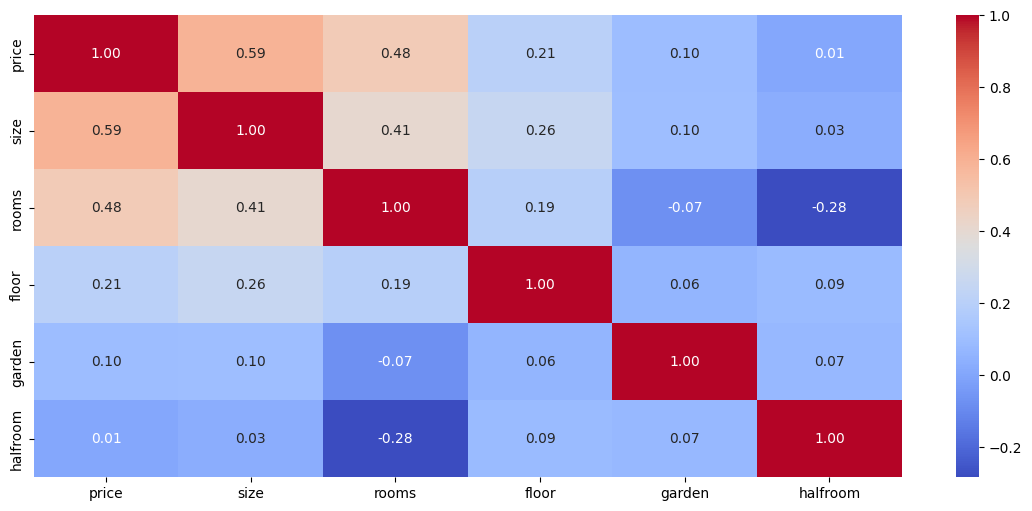

In [ ]:
# heatmap
# heatmap
# heatmap
# heatmap

correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['price'].abs().sort_values(ascending=False)
print(correlation_with_target)

# Heatmap for visualization
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


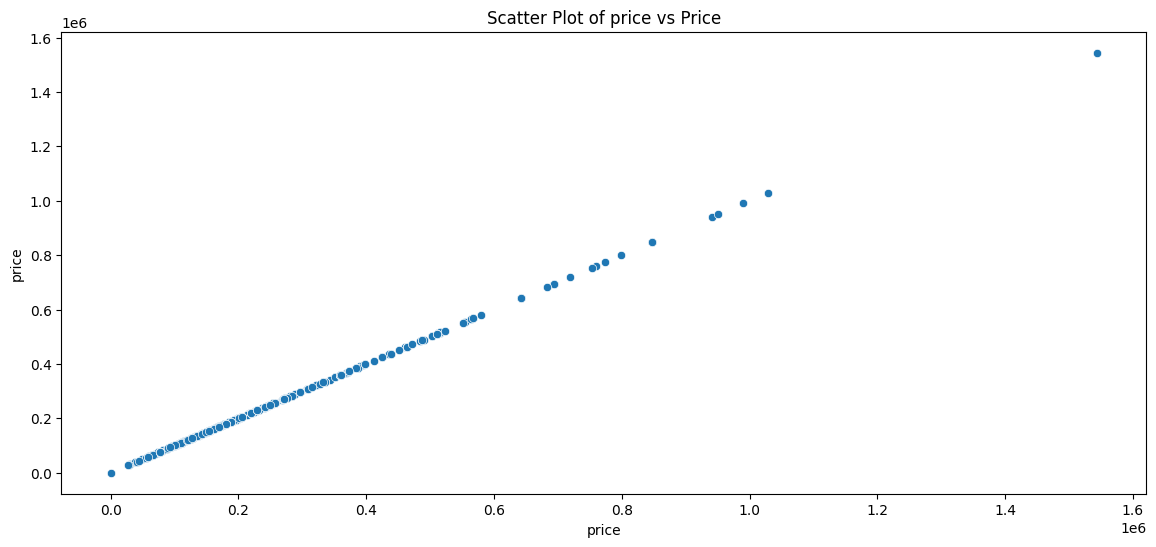

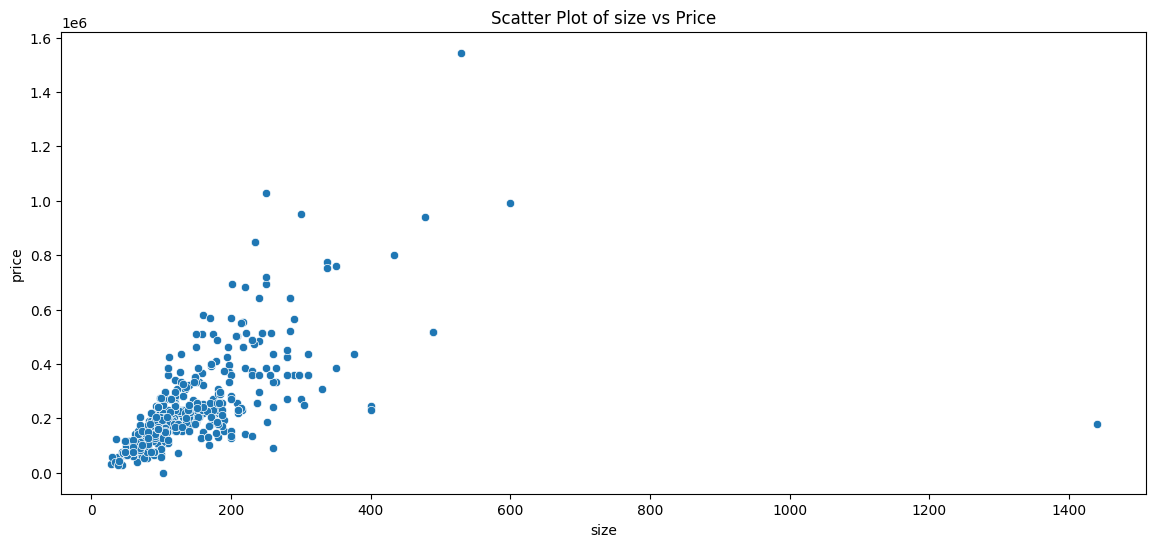

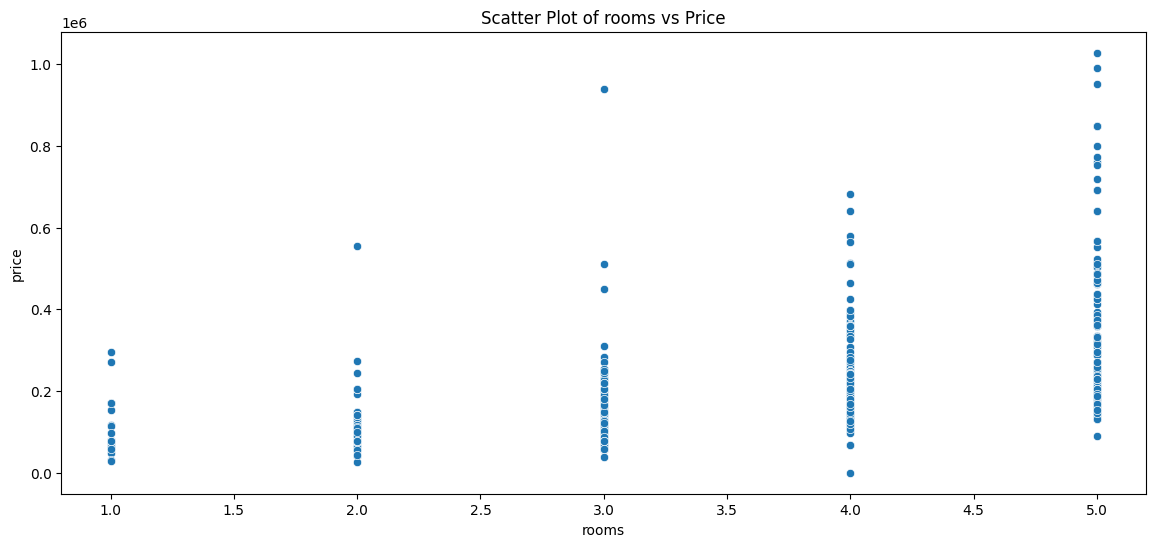

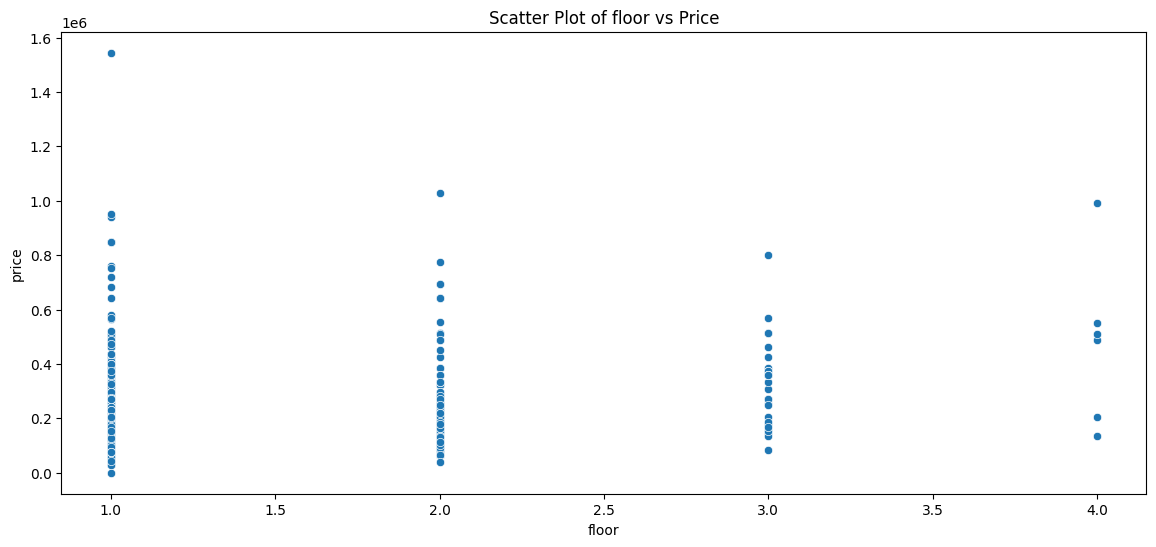

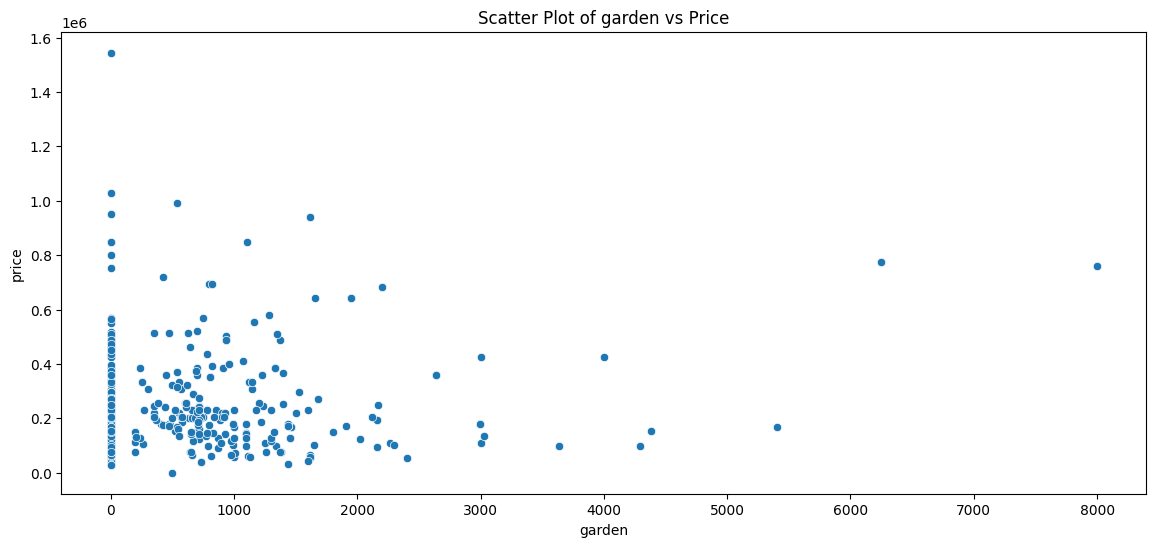

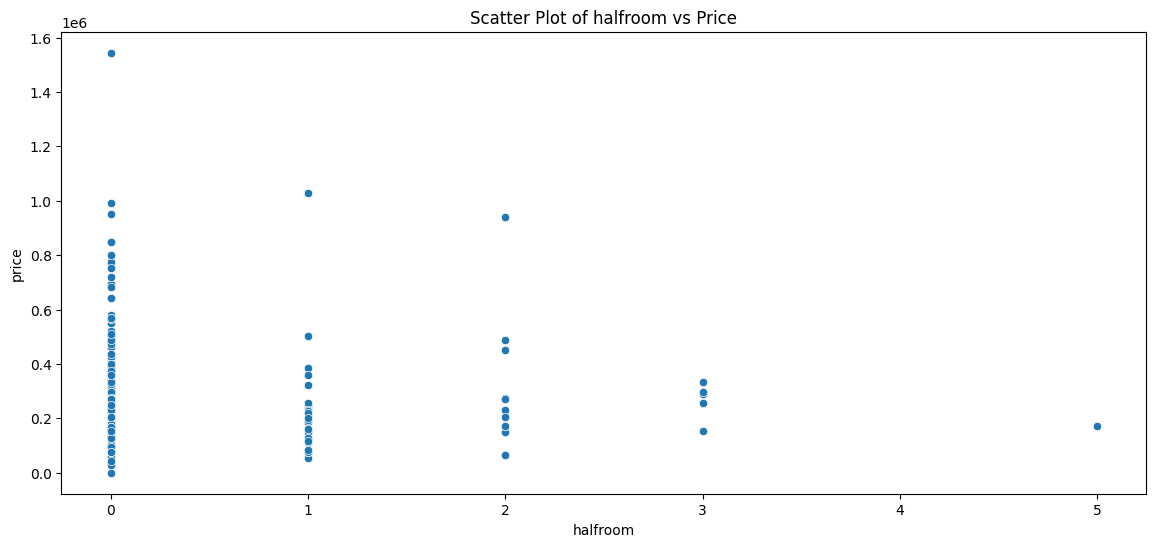

In [ ]:
# scatterplot
# scatterplot
# scatterplot
# scatterplot

import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
for feature in numeric_features:
    sns.scatterplot(x=feature, y='price', data=data)
    plt.title(f'Scatter Plot of {feature} vs Price')
    plt.show()


In [ ]:
data_numerical_features = data.select_dtypes(include='number')
data_numerical_features.columns

Index(['price', 'size', 'rooms', 'floor', 'garden', 'halfroom'], dtype='object')

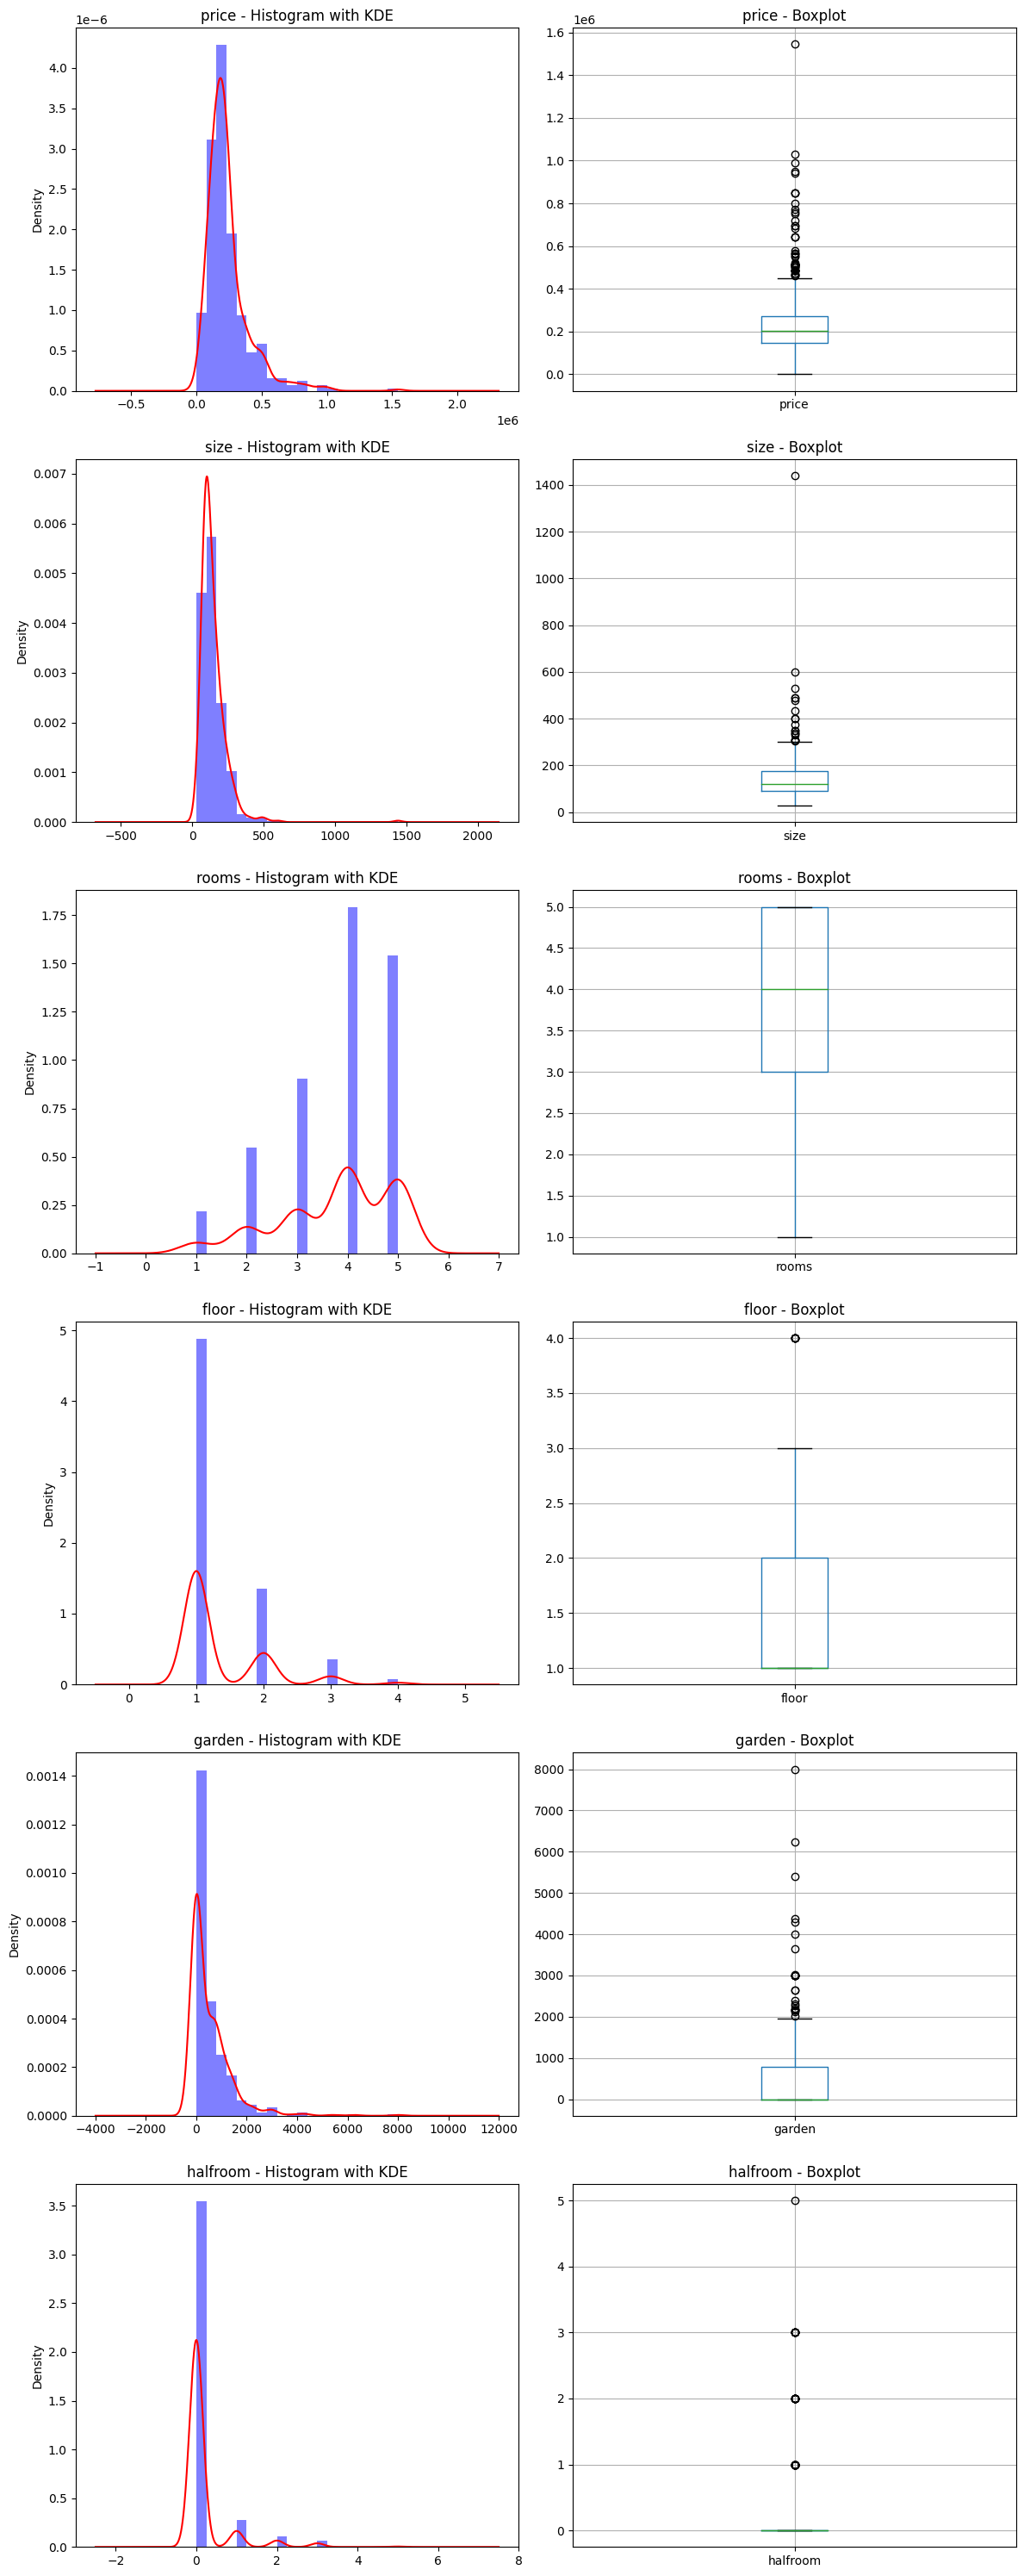

In [ ]:
# Histogram with KDE and Boxplot
# Histogram with KDE and Boxplot
# Histogram with KDE and Boxplot
# Histogram with KDE and Boxplot


import numpy as np
import matplotlib.pyplot as plt

# Sample data creation
np.random.seed(0)

# Plotting Histogram with KDE and Boxplot for each numerical feature
fig, axes = plt.subplots(len(data_numerical_features.columns), 2, figsize=(12, 5 * len(data_numerical_features.columns)))

for i, col in enumerate(data_numerical_features.columns):
    # Histogram with KDE
    data_numerical_features[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
    data_numerical_features[col].plot(kind='kde', ax=axes[i, 0], color='red')
    axes[i, 0].set_title(f'{col} - Histogram with KDE')

    # Boxplot
    data_numerical_features.boxplot(column=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()

In [ ]:
# as it appears in this dataset the garden size has alot of zeros data comparing to a range of prices
# and the correlatin to the price in this data is too low so we can drop garden and halfroom columns

In [ ]:
data = data.drop(['garden','halfroom'], axis='columns')

## <font color='#fc2222'>**Catrgorical Features**</fond>

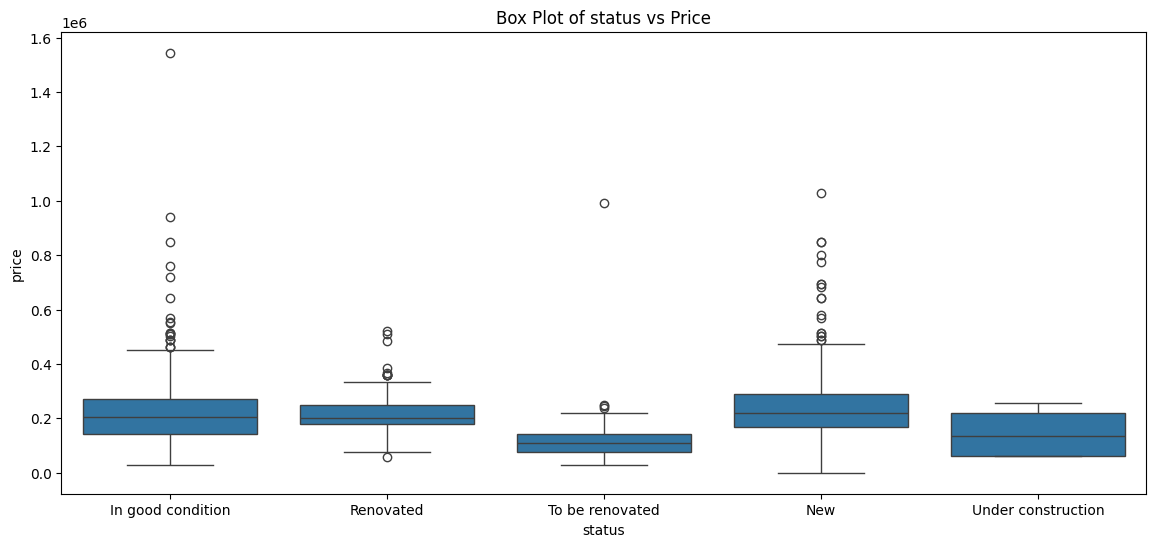

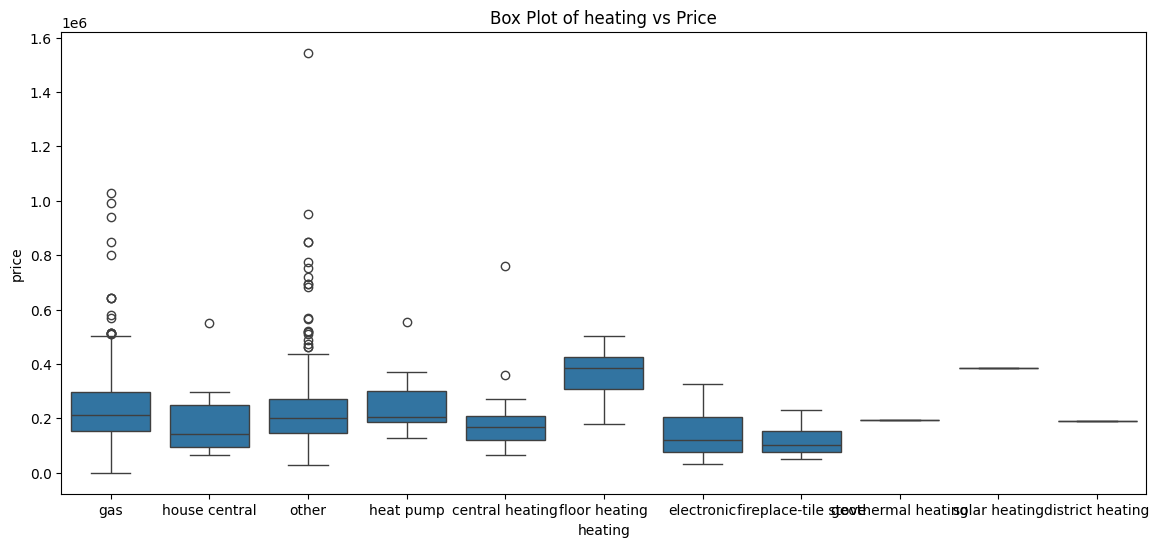

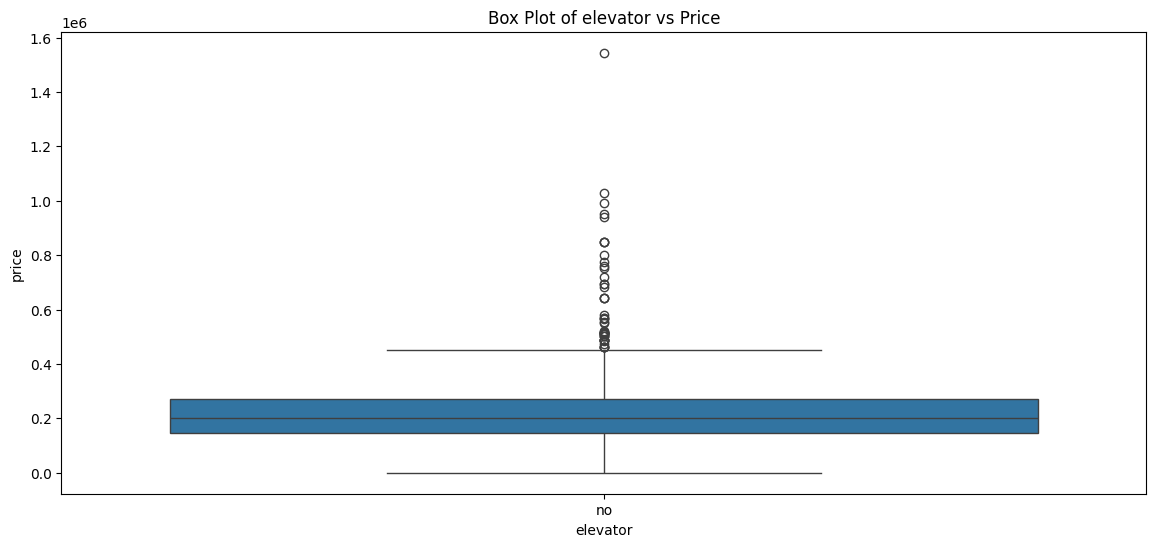

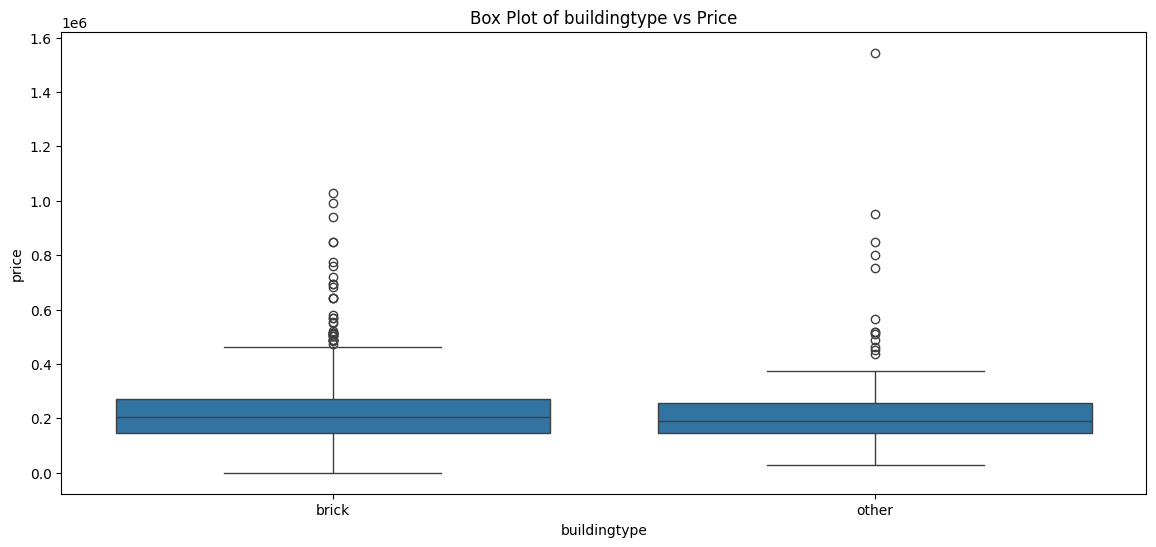

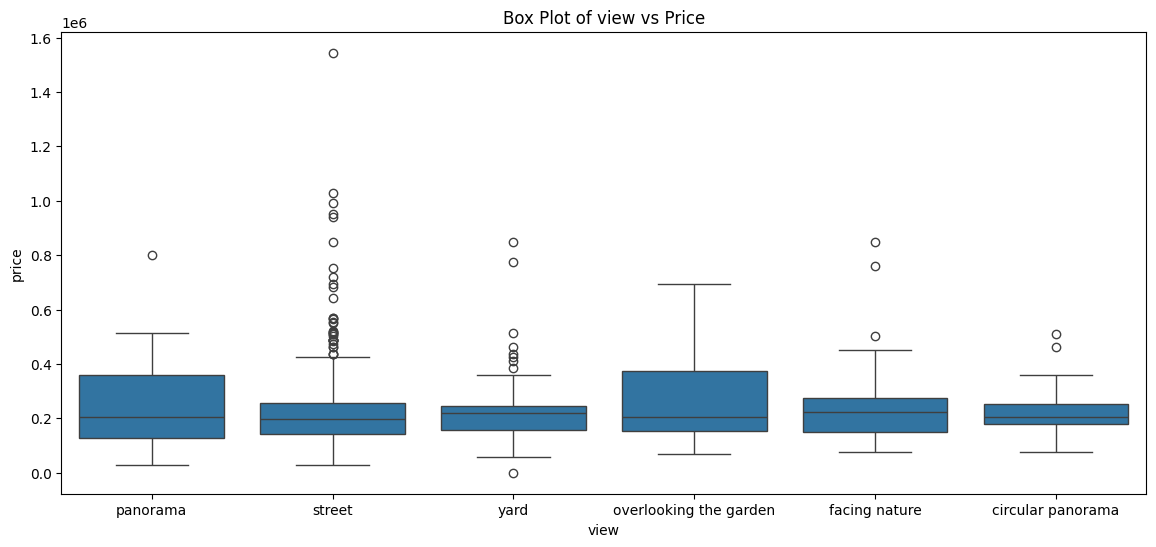

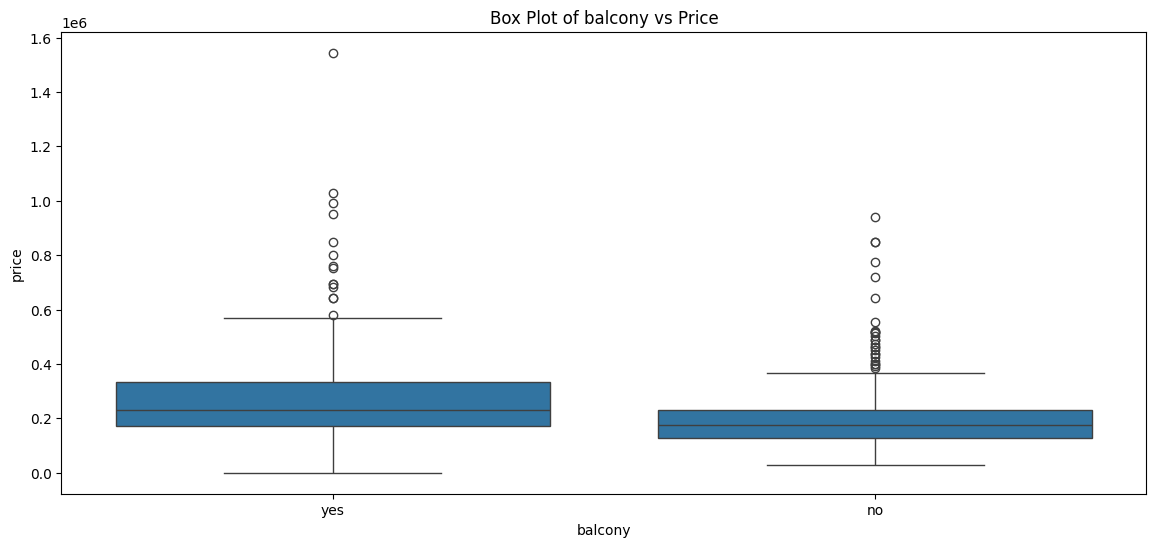

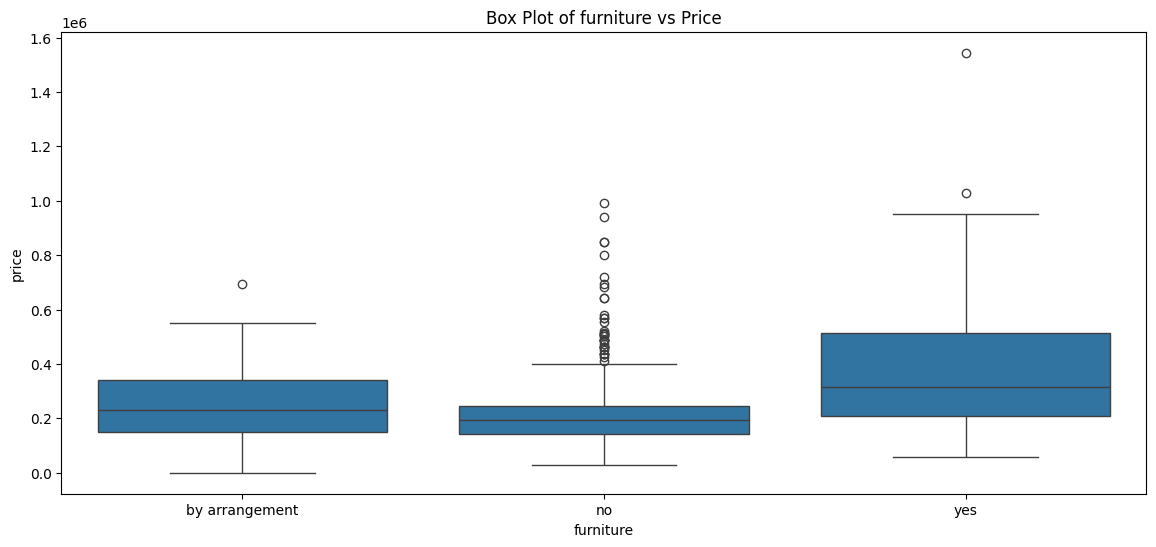

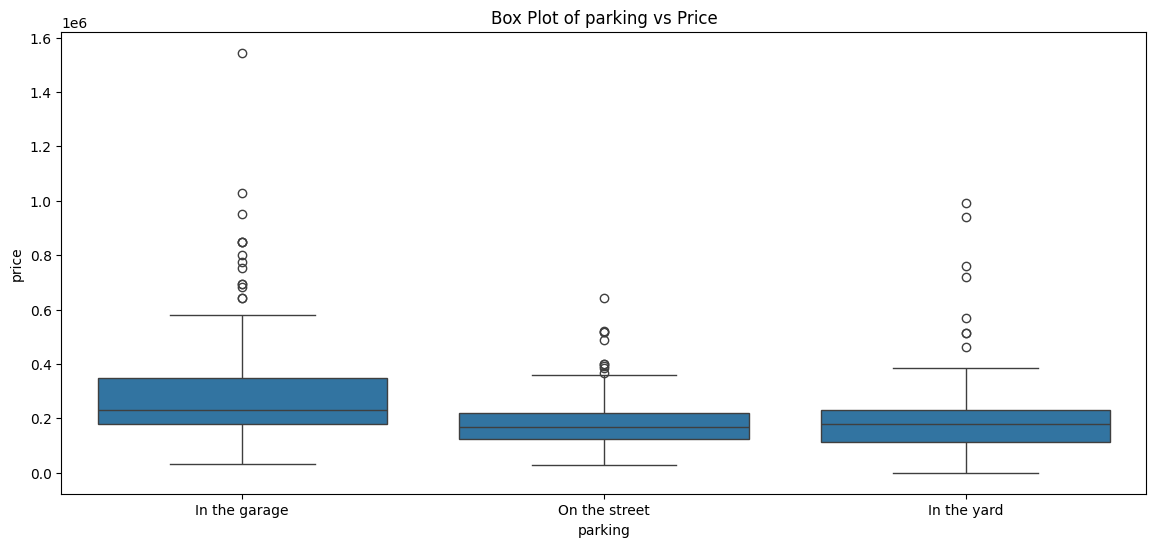

In [ ]:
import seaborn as sns

categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    sns.boxplot(x=feature, y='price', data=data)
    plt.title(f'Box Plot of {feature} vs Price')
    plt.show()


In [ ]:
'''
the code tests whether there is a significant difference in the price variable across different categories of each categorical feature,
using either ANOVA or Kruskal-Wallis test depending on the number of categories and groups available.
'''

from scipy.stats import f_oneway, kruskal

categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    groups = data.groupby(feature)['price'].apply(list)

    # Choose ANOVA or Kruskal-Wallis based on data distribution
    if data[feature].nunique() > 2:  # ANOVA for more than two categories
        p_value = f_oneway(*groups)[1]
    elif data[feature].nunique() == 2 and len(groups) >= 2:  # Kruskal-Wallis for two categories
        p_value = kruskal(*groups)[1]
    else:
        print(f"Insufficient groups for feature '{feature}'")
        continue

    print(f'{feature} p-value: {p_value}')


status p-value: 5.289461953353054e-07
heating p-value: 0.002593876723435946
Insufficient groups for feature 'elevator'
buildingtype p-value: 0.35706569282445344
view p-value: 0.6246496466911668
balcony p-value: 8.89576440852684e-10
furniture p-value: 3.789445824221702e-13
parking p-value: 1.4462498071143249e-08


In [ ]:
# categorical
# categorical
# categorical

data_categorical_features = data.select_dtypes(include='object')
data_categorical_features.columns

Index(['status', 'heating', 'elevator', 'buildingtype', 'view', 'balcony',
       'furniture', 'parking'],
      dtype='object')

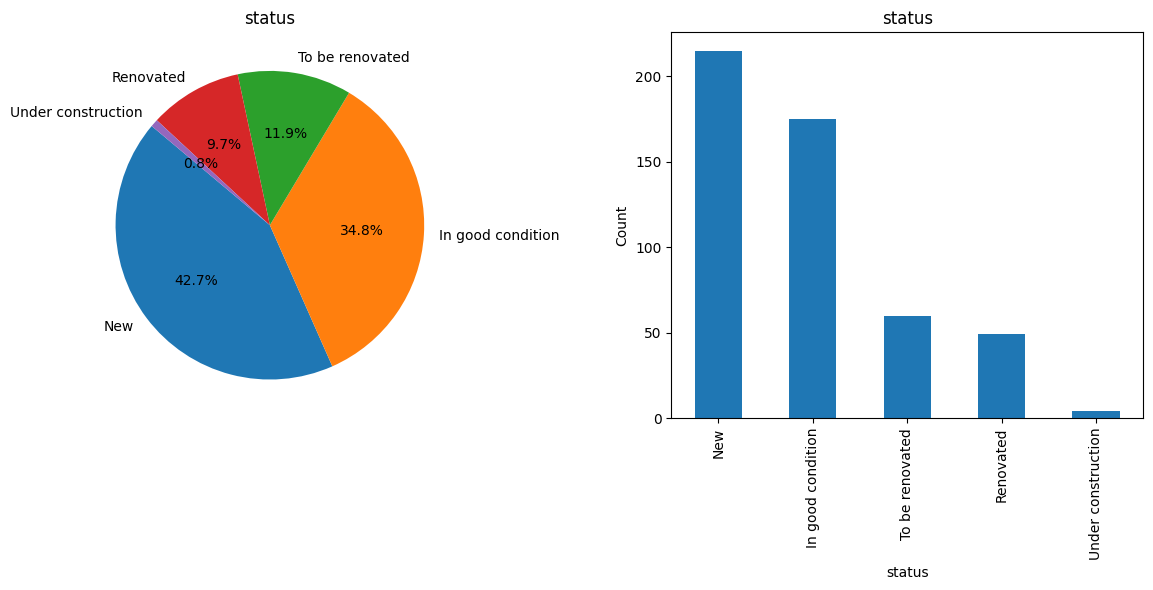

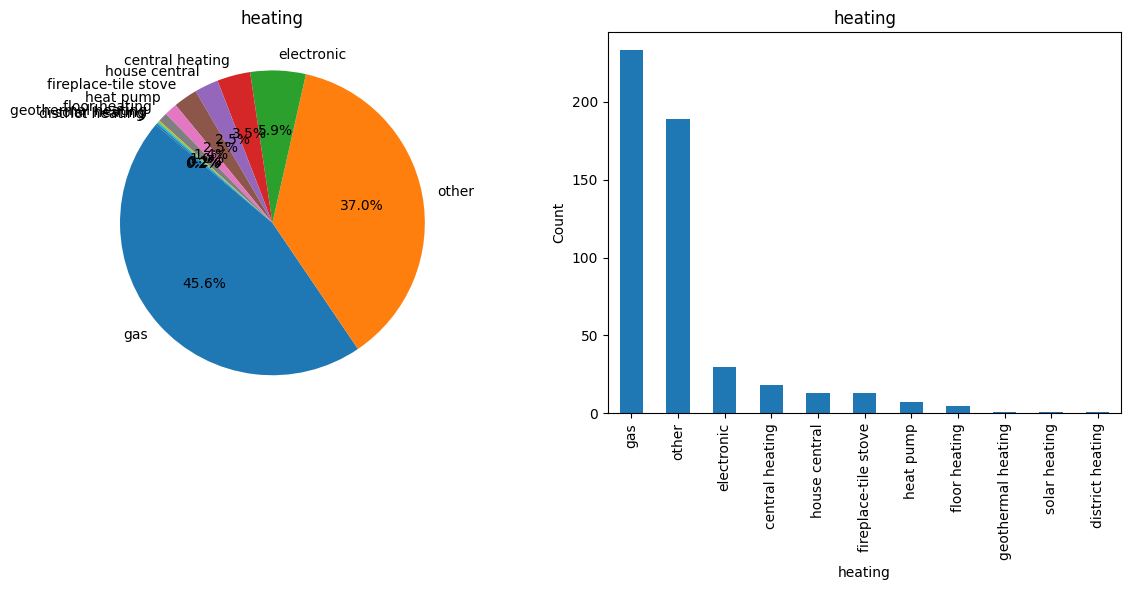

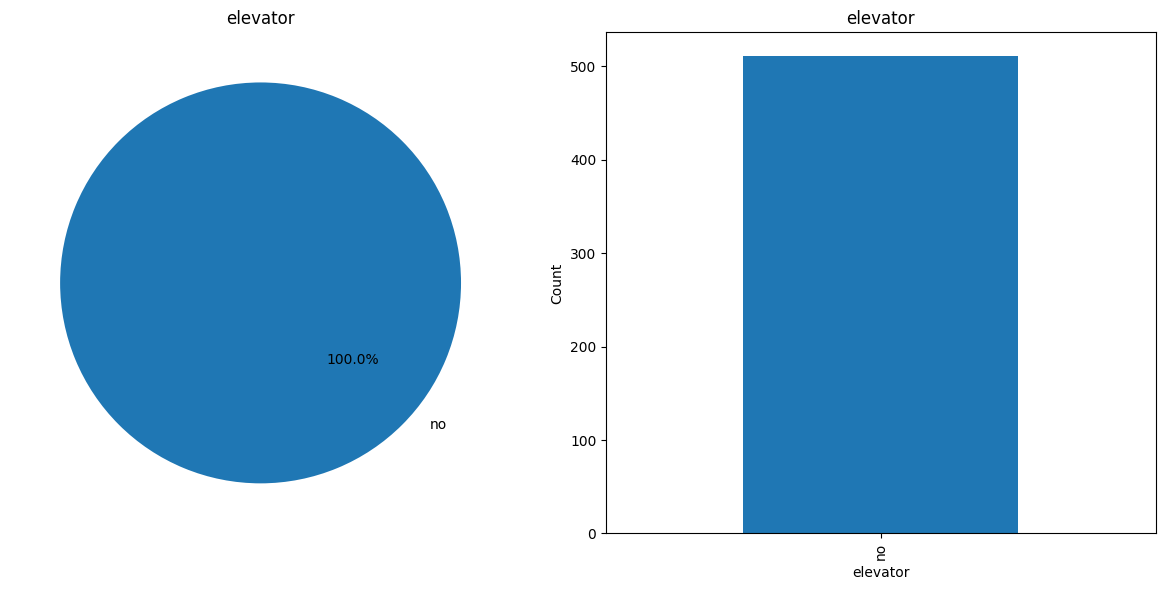

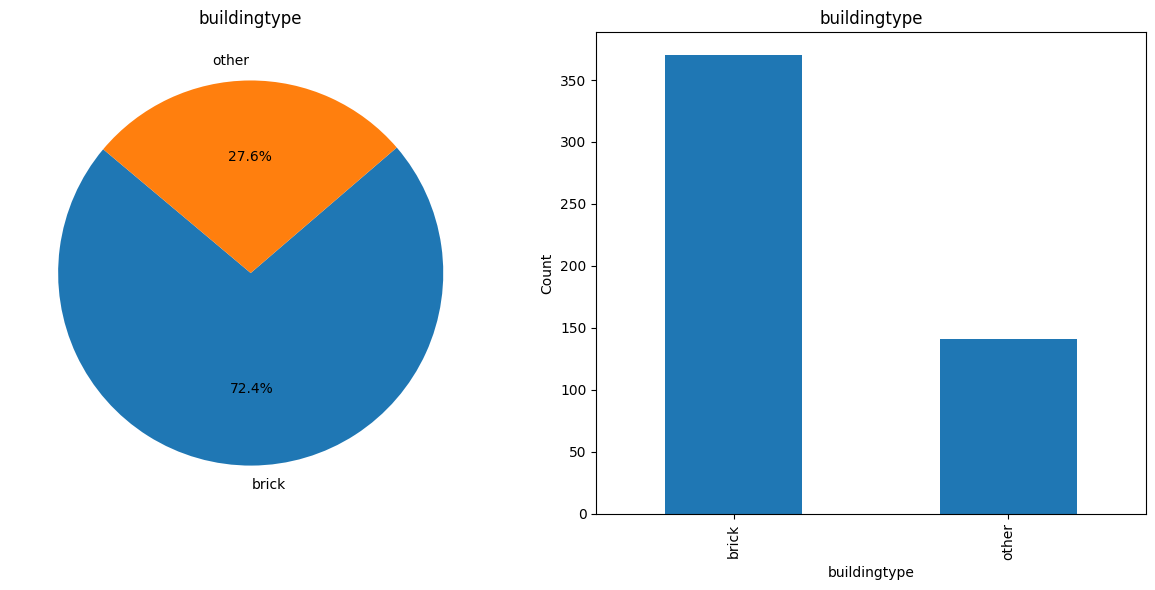

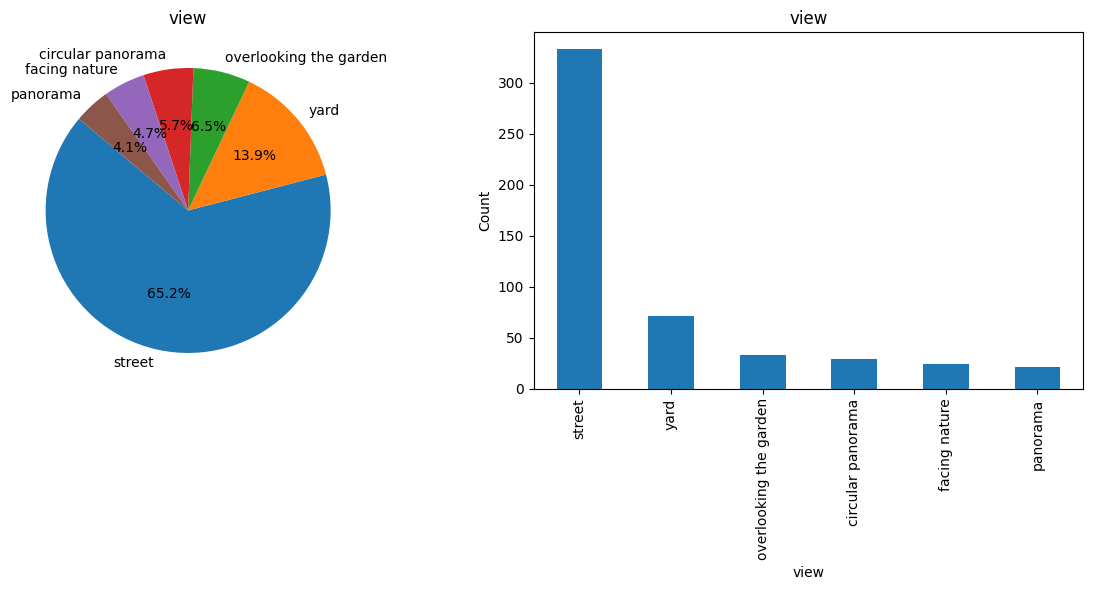

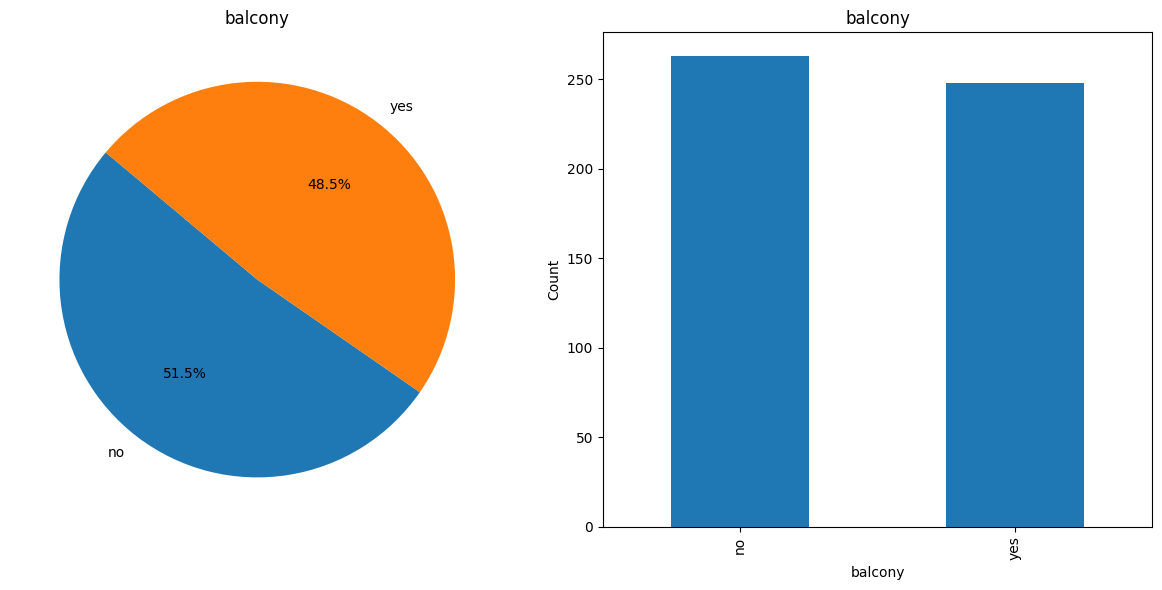

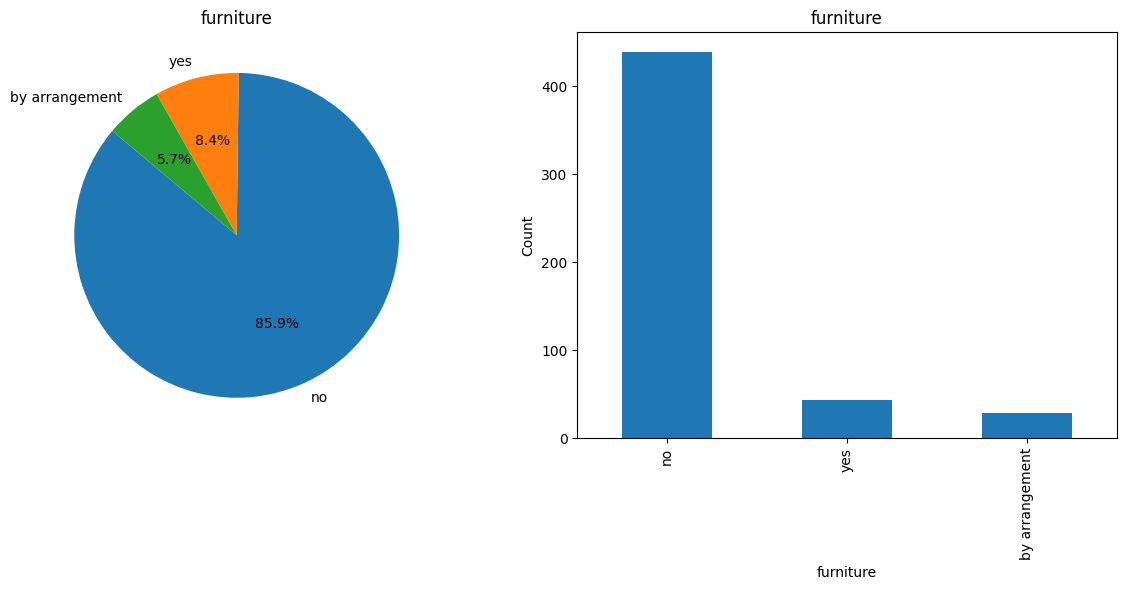

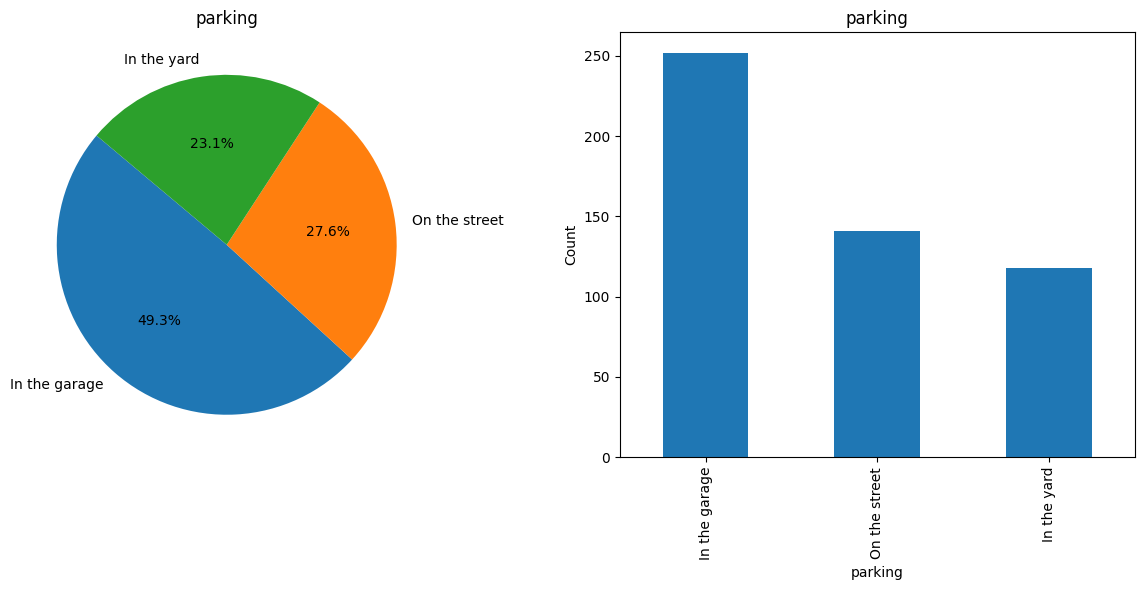

In [ ]:
for i in data_categorical_features.columns:
  counts = data_categorical_features[i].value_counts()

  # Plotting
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Pie chart
  axes[0].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
  axes[0].set_title(i)

  # Bar chart
  counts.plot(kind='bar', ax=axes[1])
  axes[1].set_title(i)
  axes[1].set_ylabel('Count')
  axes[1].set_xlabel(i)

  plt.tight_layout()
  plt.show()

In [ ]:
# the kruskal p-values of these features heating, buildingtype and view are more than 0.05 or around it
# so there is a slightly difference in the price while changing these features conditions so we can drop them
data = data.drop(['buildingtype','view','heating'], axis='columns')

In [ ]:
# there's biasing in furniture
# after trainig the mode too many times on a different models it seems the best action to enhnce the model for this set of data is to drop these feature
# because either we dont them or the column has too many outliers and missing values which we can't fill them by using mode
data = data.drop(['status','furniture','parking'], axis='columns')

## <font color='#fc2222'>**Removing outliers**</fond>

In [ ]:
# removing some outliers which are obvious from the scatter plot
data = data[data['size'] <= 460]
data = data[data['price'] >= 20000]
data = data[data['price'] <= 1000000]

In [ ]:
# i created a function to remove all outliers from the rooms and size and floor according to price for every unique value

def remove_outliers(data, column, target_column):
  grouped_df = data.groupby(target_column)
  filtered_dfs = []
  for group_name, group_data in grouped_df:
    # Calculate the interquartile range (IQR) for the current group
    Q1 = group_data[column].quantile(0.35)
    Q3 = group_data[column].quantile(0.65)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data for the current group based on the outlier bounds
    filtered_group_data = group_data[(group_data[column] >= lower_bound) & (group_data[column] <= upper_bound)]

    # Append the filtered group data to the list
    filtered_dfs.append(filtered_group_data)

  # Concatenate the filtered dataframes into a single dataframe
  filtered_df = pd.concat(filtered_dfs)

  return filtered_df

data = remove_outliers(data, 'rooms', 'price')
data = remove_outliers(data, 'size', 'price')
data = remove_outliers(data, 'floor', 'price')
print(data)


## <font color='#fc2222'>**The model**</fond>

In [ ]:
# change the model variable according to the desired one

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pickle

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()

# Fit LabelEncoder on the entire dataset
combined_data = pd.concat([data['balcony']])
label_encoder.fit(combined_data)

# Save the label_encoder to a file
with open('label_encoder.pkl', 'wb') as encoder_file:
    pickle.dump(label_encoder, encoder_file)

data['balcony'] = label_encoder.transform(data['balcony'])

X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Initialize the model (Random Forest Regressor) or (LinearRegression)
model = RandomForestRegressor(max_depth=10, n_estimators=20, min_samples_split=10, random_state=42)
#model = LinearRegression()

# Train the model
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f'R-squared (R2): {r2}')


# Input data for prediction
new_data = pd.DataFrame({
    'size': [90],
    'rooms': [4],
    'floor': [1],
    'balcony': ['no']
})

new_data['balcony'] = label_encoder.transform(new_data['balcony'])

predicted_price = model.predict(new_data)
print(f'Predicted Price: {predicted_price[0]}')

with open('trained_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

             price  size  rooms  floor balcony
1596  27066.738845    38    2.0      1      no
1023  28355.631171    44    1.0      1      no
744   30675.637357    28    1.0      1     yes
746   38666.769778    66    3.0      1     yes
1332  41244.554430    34    2.0      2     yes
R-squared (R2): 0.7016210918157144
Predicted Price: 160563.9008508083


<font color='4fcccc'></fond>
**R2 scores for the Random Forest Regressor and Linear Regressor models:**

---

<font color='4fcccc'></fond>
Random Forest Regressor Model:

<font color='4fffc3'></fond>
R2 Score (Testing Set): 0.70
R2 Score (Training Set): 0.73
Analysis:
The R2 score for the testing set (0.70) is slightly lower than that of the training set (0.73).

<font color='4fcccc'></fond>
Linear Regressor Model:

<font color='4fffc3'></fond>
R2 Score: 0.61
Analysis:
The R2 score for the linear regressor model is 0.61. This suggests that the linear model performs moderately well in explaining the variance in the data, although it may not capture all the complexities present.

<font color='4fff13'></fond>
Conclusion:

<font color='4fff13'></fond>
The Random Forest Regressor model demonstrates better performance compared to the Linear Regressor model, as indicated by the higher R2 score.
There might be a slight overfitting concern with the Random Forest Regressor

In [ ]:
# applynig GridSearchCV to find the best model and it's hyperparameters

'''
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Define parameter grids for GridSearchCV
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [20,50, 100, 150], 'max_depth': [None,10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'Gradient Boosting': {'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.01, 0.1, 0.2, 0.3]}
}

# Loop through models
for name, model in models.items():
    print(f"\n{30*'='}\n{name}\n{30*'='}")

    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_


    model = model.set_params(**best_params)
    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    r2_train = r2_score(y_train, train_predictions)
    r2_test = r2_score(y_test, test_predictions)

    print(f'Best Parameters: {best_params}')
    print(f'R-squared (R2) - Training Set: {r2_train}')
    print(f'R-squared (R2) - Testing Set: {r2_test}')

    new_data = pd.DataFrame({
      'size': [90],
      'rooms': [4],
      'floor': [1],
      'balcony': ['no']

    })

    new_data['balcony'] = label_encoder.transform(new_data['balcony'])

    # Make prediction
    predicted_price = model.predict(new_data)
    print(f'Predicted Price: {predicted_price[0]}')
'''

In [ ]:
# we can use a library called Pycaret to find the best model and how they perform according to our data

'''
# Install PyCaret if not already installed
# !pip install pycaret

from pycaret.regression import *
exp_reg = setup(data, target='price', categorical_features=['balcony'])
best_model = compare_models()
final_model = finalize_model(best_model)

plot_model(final_model, plot='residuals')
plot_model(final_model, plot='feature')

new_data = pd.DataFrame({
    'size': [90],
    'rooms': [4],
    'floor': [1],
    'balcony': ['no']
})

predictions = predict_model(final_model, data=new_data)
print(predictions.columns)
print(f'Predicted Price: {predictions["prediction_label"].iloc[0]}')

'''

# <font color='#048ad2'>**Creating our Streamlit app For Gyor Houses (Run only one of the models)**</fond>

In [ ]:
#note

# if the app not worked on colab
        # download anaconda
        # open anaconda navigator then enviroments then run base env as prompt
        # navigate to the folder where u put the app.py and the 2 pkl files (download them from files in colab)
        # and run this line (streamlit run app.py)

In [ ]:
# Creating our Streamlit app for random_forest_model.pkl
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle

# Load the trained model
with open('random_forest_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('label_encoder.pkl', 'rb') as encoder_file:
    label_encoder = pickle.load(encoder_file)

# Function to make predictions
def predict_price(size, rooms, floor, balcony):
    input_data = pd.DataFrame({
        'size': [size],
        'rooms': [rooms],
        'floor': [floor],
        'balcony': [balcony]
    })

    # Apply LabelEncoder to the 'balcony' column in new_data
    input_data['balcony'] = label_encoder.transform(input_data['balcony'])

    # Make prediction
    predicted_price = model.predict(input_data)
    return predicted_price[0]

# Streamlit app
st.title('Real Estate Price Prediction App')

# Input form
size = st.number_input('Size', min_value=1)
rooms = st.number_input('Number of Rooms', min_value=1)
floor = st.number_input('Floor', min_value=1)
balcony = st.selectbox('Balcony', ['yes', 'no'])

# Make prediction on button click
if st.button('Predict Price'):
    predicted_price = predict_price(size, rooms, floor, balcony)
    price_per_m2 = predicted_price / size
    st.success(f'Predicted Price: {predicted_price}')
    st.info(f'Price per m2: {price_per_m2}')

In [ ]:
# Creating our Streamlit app for linear_model.pkl
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle

# Load the trained model
with open('linear_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('label_encoder.pkl', 'rb') as encoder_file:
    label_encoder = pickle.load(encoder_file)

# Function to make predictions
def predict_price(size, rooms, floor, balcony):
    input_data = pd.DataFrame({
        'size': [size],
        'rooms': [rooms],
        'floor': [floor],
        'balcony': [balcony]
    })

    # Apply LabelEncoder to the 'balcony' column in new_data
    input_data['balcony'] = label_encoder.transform(input_data['balcony'])

    # Make prediction
    predicted_price = model.predict(input_data)
    return predicted_price[0]

# Streamlit app
st.title('Real Estate Price Prediction App')

# Input form
size = st.number_input('Size', min_value=1)
rooms = st.number_input('Number of Rooms', min_value=1)
floor = st.number_input('Floor', min_value=1)
balcony = st.selectbox('Balcony', ['yes', 'no'])

# Make prediction on button click
if st.button('Predict Price'):
    predicted_price = predict_price(size, rooms, floor, balcony)
    price_per_m2 = predicted_price / size
    st.success(f'Predicted Price: {predicted_price}')
    st.info(f'Price per m2: {price_per_m2}')


In [ ]:
!streamlit run app.py

# <font color='#048ad2'>**Results from Streamlit app (For Gyor Houses) Images**</fond>

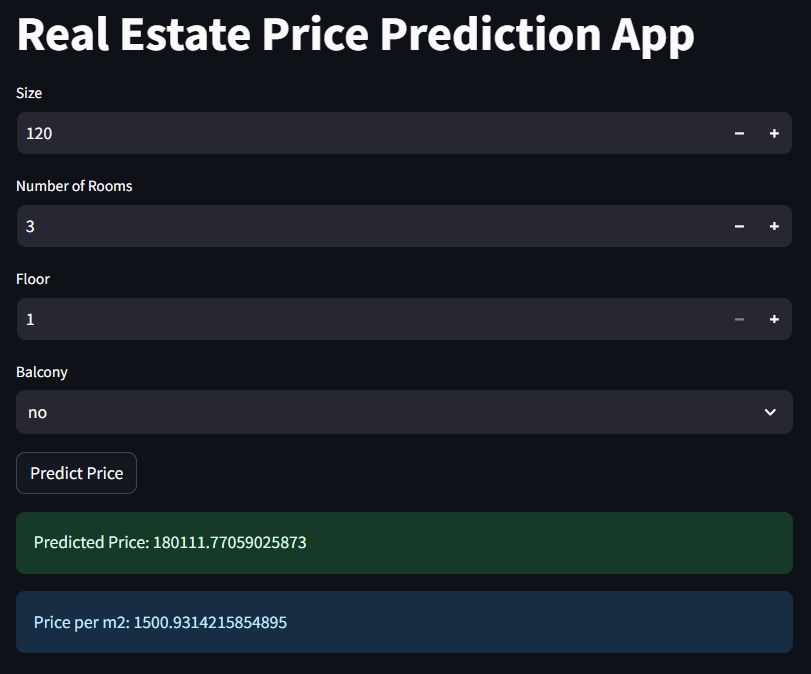

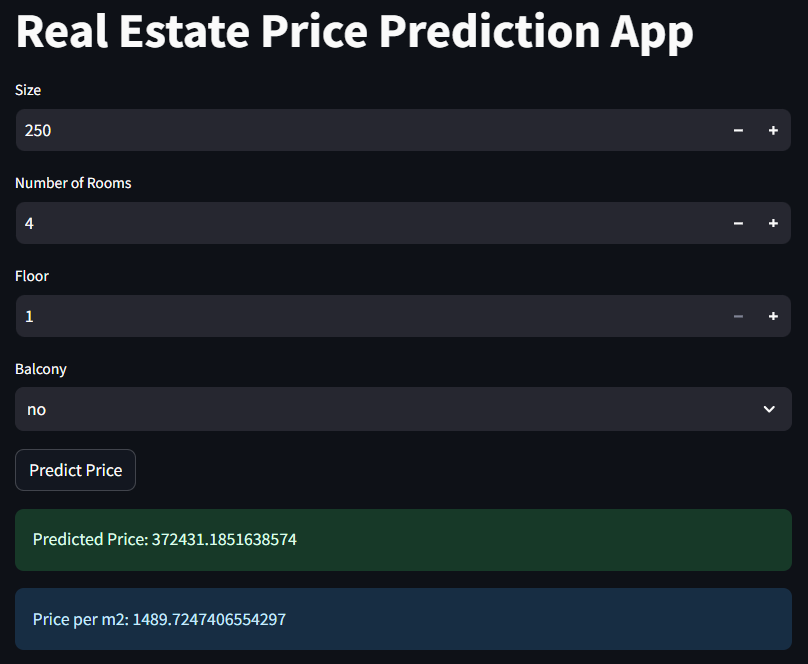

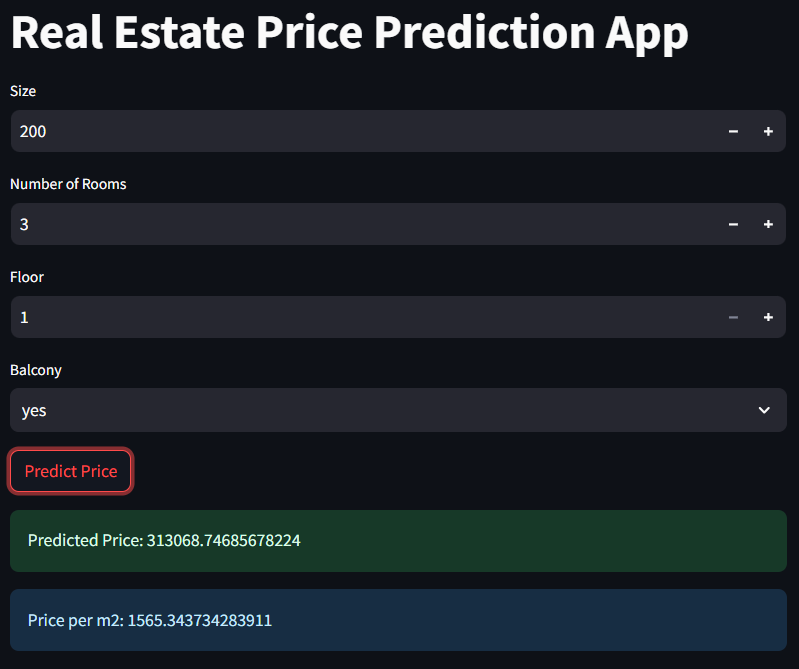

# <font color='#green'>**Creating our Streamlit app (For Gyor, Budapest, Pecs)**</fond>

In [ ]:
#note

# if the app not worked on colab
        # download anaconda
        # open anaconda navigator then enviroments then run base env as prompt
        # navigate to the folder where u put the app.py and the 2 pkl files (download them from files in colab)
        # and run this line (streamlit run app.py)

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle

# Load models and encoders for Gyor, Budapest, and Pecs
with open('random_forest_model.pkl', 'rb') as model_file:
    model_gyor = pickle.load(model_file)

with open('GradientBoosting.pkl', 'rb') as model_file:
    model_budapest = pickle.load(model_file)

with open('lightgbm.pkl', 'rb') as model_file:
    model_pecs = pickle.load(model_file)

with open('l_e_g.pkl', 'rb') as encoder_file:
    label_encoder_gyor = pickle.load(encoder_file)

with open('l_e_b.pkl', 'rb') as encoder_file:
    label_encoder_budapest = pickle.load(encoder_file)

with open('l_e_p.pkl', 'rb') as encoder_file:
    label_encoder_pecs = pickle.load(encoder_file)

# Prediction functions for each city
def predict_price_gyor(size, rooms, floor, balcony):
    input_data = pd.DataFrame({
        'size': [size],
        'rooms': [rooms],
        'floor': [floor],
        'balcony': [balcony]
    })
    input_data['balcony'] = label_encoder_gyor.transform(input_data['balcony'])
    predicted_price = model_gyor.predict(input_data)
    return predicted_price[0]

def predict_price_budapest(size, rooms, status, floor, balcony, parking):
    input_data = pd.DataFrame({
       'size': [size],
       'rooms': [rooms],
       'status': [status],
       'floor': [floor],
       'balcony': [balcony],
       'parking': [parking]
    })
    input_data['balcony'] = label_encoder_budapest.transform(input_data['balcony'])
    input_data['status'] = label_encoder_budapest.transform(input_data['status'])
    input_data['parking'] = label_encoder_budapest.transform(input_data['parking'])
    predicted_price = model_budapest.predict(input_data)
    return predicted_price[0]

def predict_price_pecs(size, rooms, status, floor, balcony, parking):
    input_data = pd.DataFrame({
       'size': [size],
       'rooms': [rooms],
       'status': [status],
       'floor': [floor],
       'balcony': [balcony],
       'parking': [parking]
    })
    input_data['balcony'] = label_encoder_pecs.transform(input_data['balcony'])
    input_data['status'] = label_encoder_pecs.transform(input_data['status'])
    input_data['parking'] = label_encoder_pecs.transform(input_data['parking'])
    predicted_price = model_pecs.predict(input_data)
    return predicted_price[0]

# Streamlit app
st.title('Hungary - Real Estate Price Prediction App')

# Select city
city = st.selectbox('Select City', ['Gyor', 'Budapest', 'Pecs'])

if city == 'Gyor':
    st.header('Gyor Real Estate Price Prediction')
    size = st.number_input('Size', min_value=1)
    rooms = st.number_input('Number of Rooms', min_value=1)
    floor = st.number_input('Floor', min_value=1)
    balcony = st.selectbox('Balcony', ['yes', 'no'])
    if st.button('Predict Price'):
        predicted_price = predict_price_gyor(size, rooms, floor, balcony)
        price_per_m2 = predicted_price / size
        st.success(f'Predicted Price: {predicted_price}')
        st.info(f'Price per m²: {price_per_m2}')

elif city == 'Budapest':
    st.header('Budapest Real Estate Price Prediction')
    size = st.number_input('Size', min_value=1)
    rooms = st.number_input('Number of Rooms', min_value=1)
    floor = st.number_input('Floor', min_value=1)
    balcony = st.selectbox('Balcony', ['yes', 'no'])
    status = st.selectbox('Status', ['In good condition', 'To be renovated', 'Renovated', 'New', 'Under construction'])
    parking = st.selectbox('Parking', ['In the garage', 'On the street', 'In the yard'])
    if st.button('Predict Price'):
        predicted_price = predict_price_budapest(size, rooms, status, floor, balcony, parking)
        price_per_m2 = predicted_price / size
        st.success(f'Predicted Price: {predicted_price}')
        st.info(f'Price per m²: {price_per_m2}')

else:
    st.header('Pecs Real Estate Price Prediction')
    size = st.number_input('Size', min_value=1)
    rooms = st.number_input('Number of Rooms', min_value=1)
    floor = st.number_input('Floor', min_value=1)
    balcony = st.selectbox('Balcony', ['yes', 'no'])
    status = st.selectbox('Status', ['In good condition', 'To be renovated', 'Renovated', 'New', 'Under construction'])
    parking = st.selectbox('Parking', ['In the garage', 'On the street', 'In the yard'])
    if st.button('Predict Price'):
        predicted_price = predict_price_pecs(size, rooms, status, floor, balcony, parking)
        price_per_m2 = predicted_price / size
        st.success(f'Predicted Price: {predicted_price}')
        st.info(f'Price per m²: {price_per_m2}')


In [ ]:
!streamlit run app.py

# <font color='#green'>**Results from Streamlit app (For Gyor, Budapest, Pecs) Images**</fond>

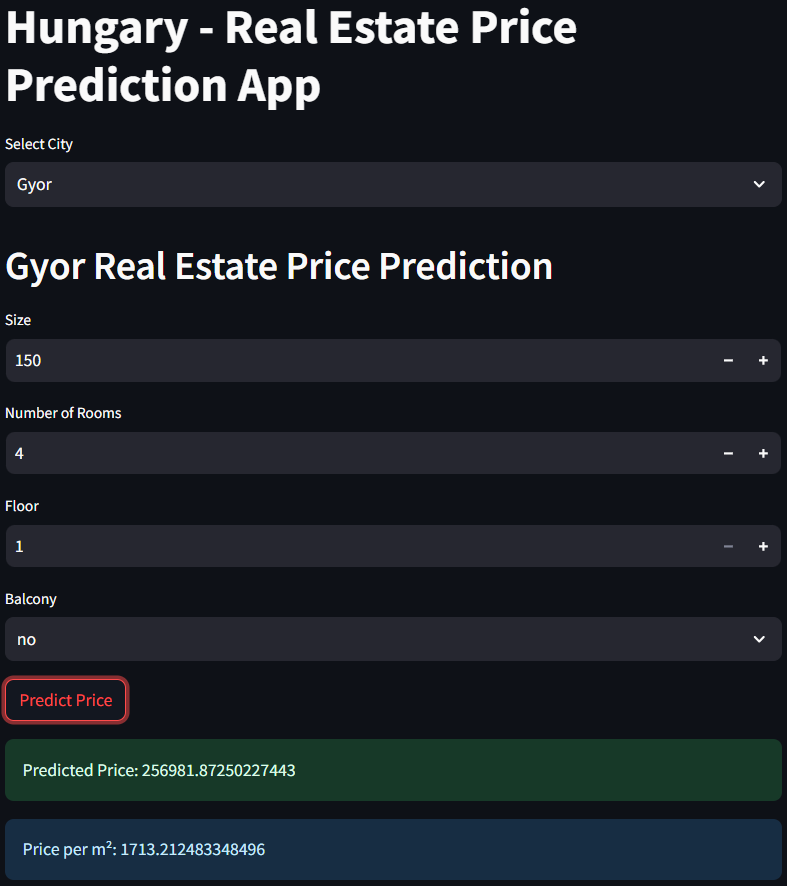

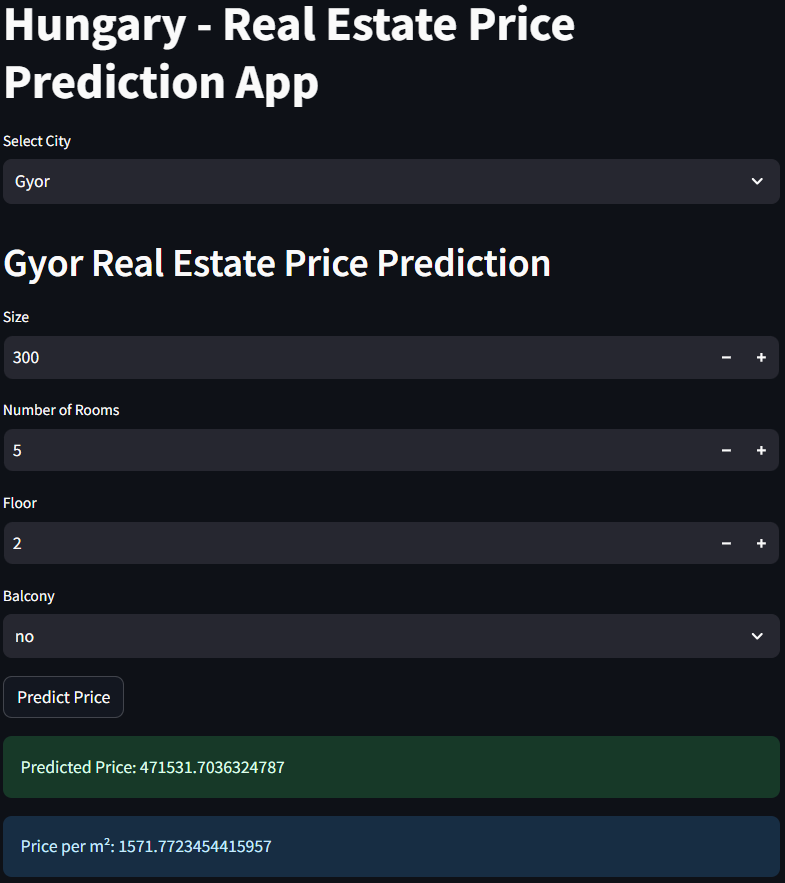

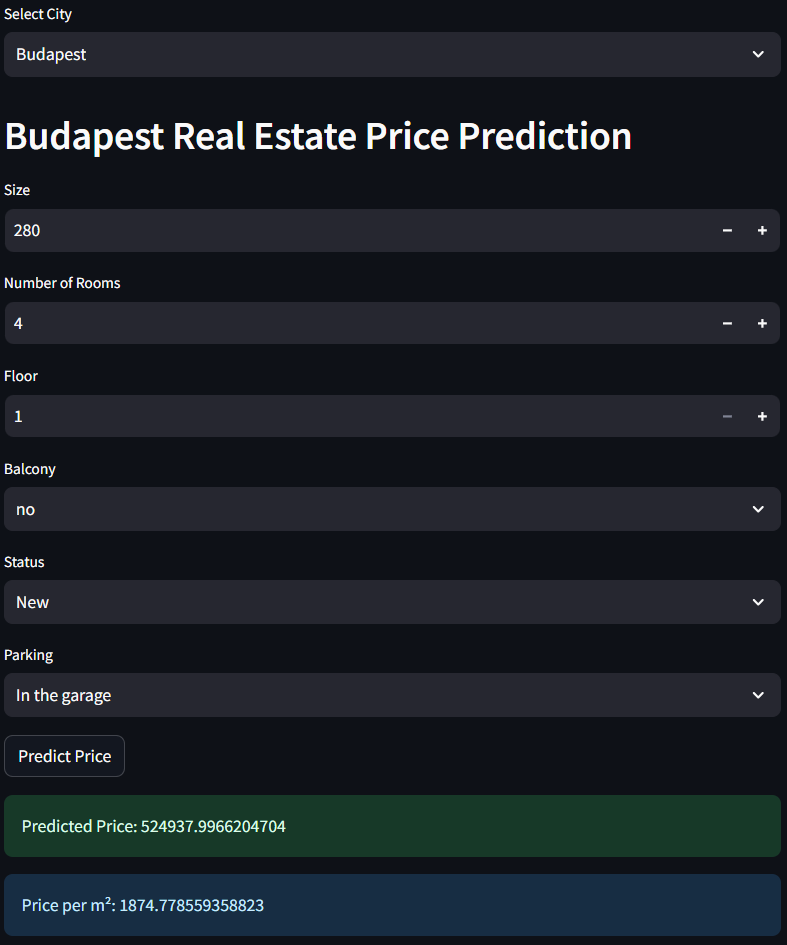

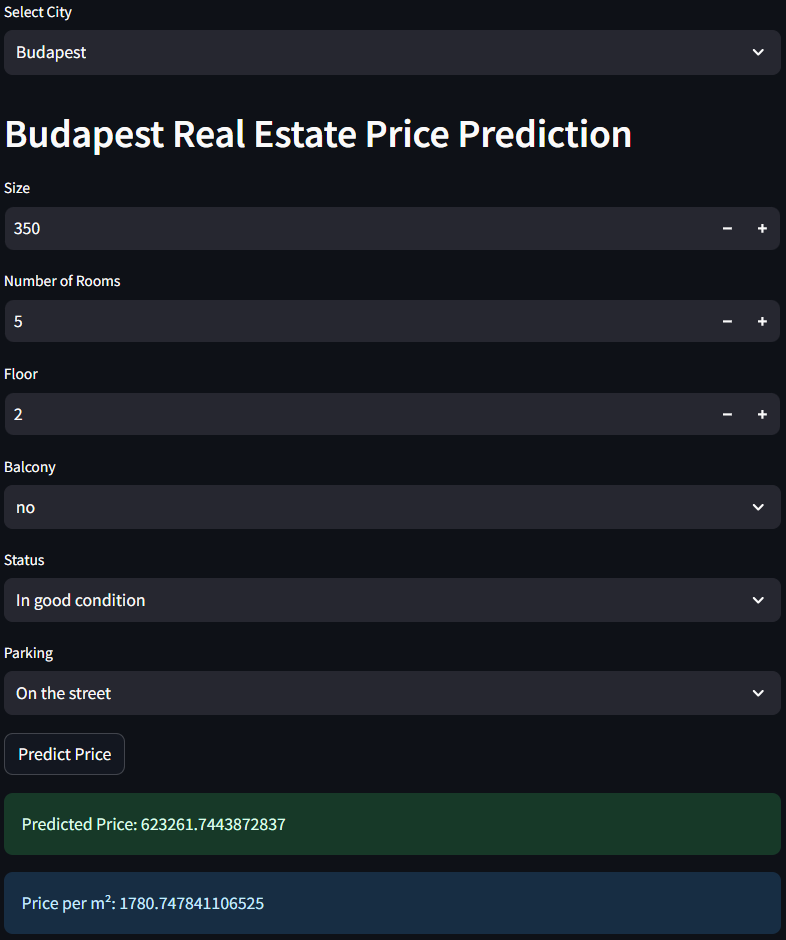

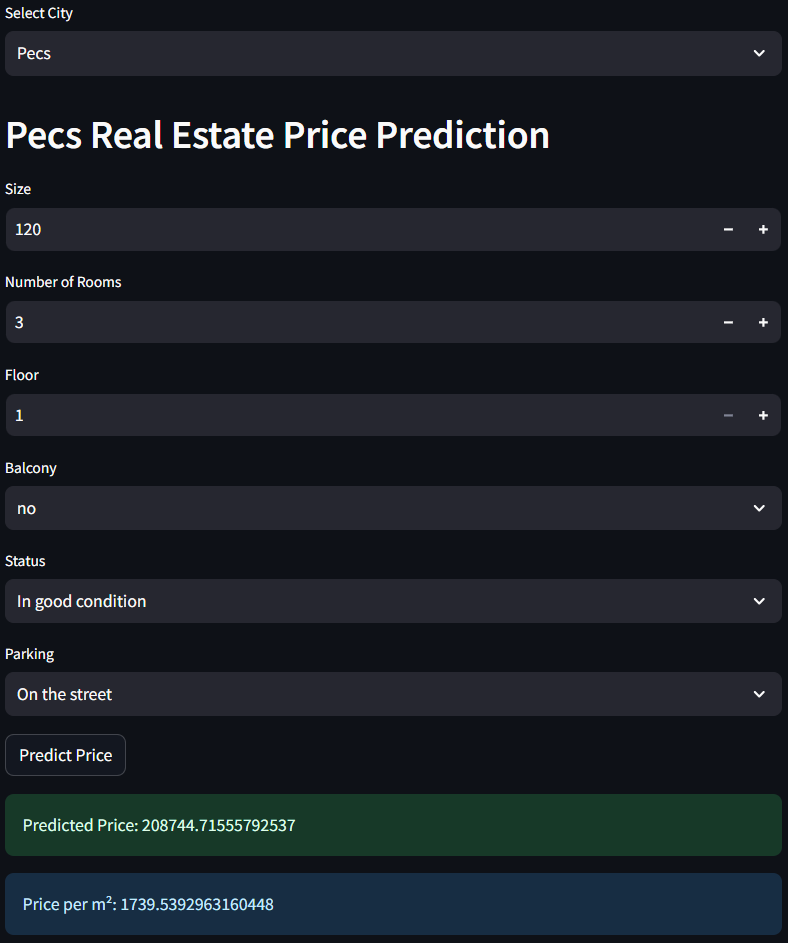

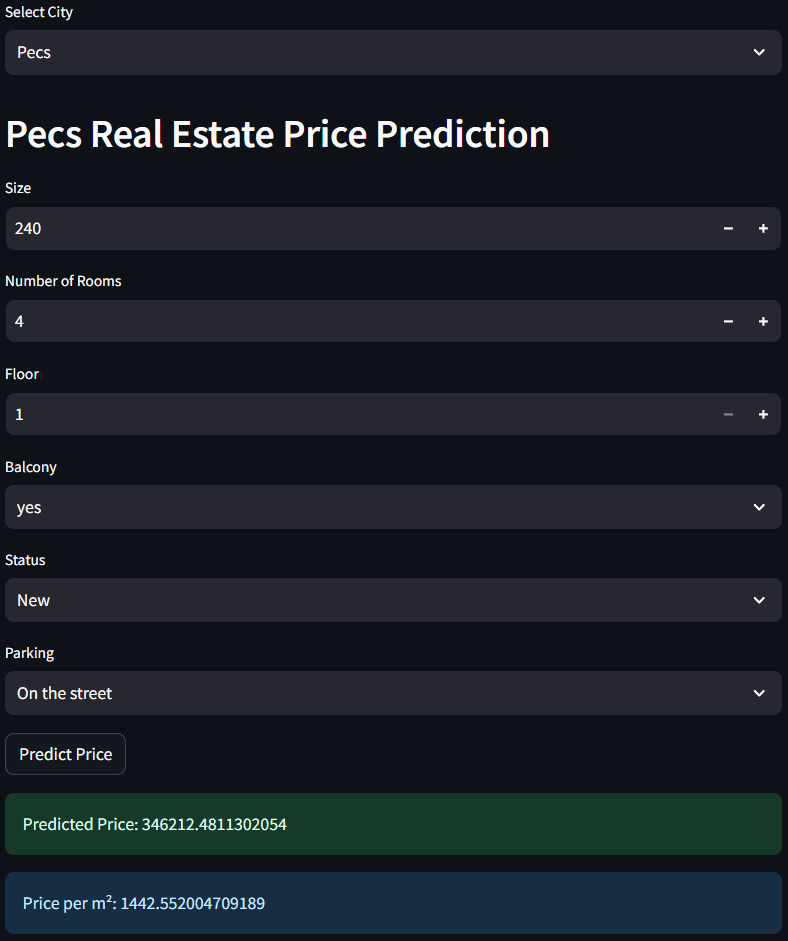